In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report
import warnings
!pip install kagglehub
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,6]

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mvieira101/global-cost-of-living")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\globa\.cache\kagglehub\datasets\mvieira101\global-cost-of-living\versions\2


In [210]:
df1 = pd.read_csv('C:/Users/globa/.cache/kagglehub/datasets/mvieira101/global-cost-of-living/versions/2/cost-of-living.csv')
df1.head()

Unnamed: 0      city      country    x1     x2    x3    x4    x5    x6  \
0           0     Delhi        India  4.90  22.04  4.28  1.84  3.67  1.78   
1           1  Shanghai        China  5.59  40.51  5.59  1.12  4.19  3.96   
2           2   Jakarta    Indonesia  2.54  22.25  3.50  2.02  3.18  2.19   
3           3    Manila  Philippines  3.54  27.40  3.54  1.24  1.90  2.91   
4           4     Seoul  South Korea  7.16  52.77  6.03  3.02  4.52  3.86   

     x7    x8    x9   x10   x11   x12    x13    x14    x15   x16   x17   x18  \
0  0.48  0.19  0.73  0.51  0.88  1.01   4.32   3.79   5.57  1.80  0.75  1.01   
1  0.52  0.32  2.68  2.57  1.18  2.17  18.01   4.67  12.79  2.22  1.55  2.11   
2  0.59  0.27  1.28  1.21  0.83  1.70   6.66   3.46   8.32  2.80  1.52  2.08   
3  0.93  0.51  1.63  1.19  0.89  1.73   5.06   4.19   6.64  2.66  1.42  2.95   
4  1.46  0.78  2.13  2.78  3.66  4.02  11.13  10.62  40.41  6.79  3.70  6.40   

    x19   x20   x21   x22   x23    x24   x25   x26   x27   x28    x29   x30  \
0  0.60  0.36  0.41  0.70  0.36   9.79  1.53  2.51  4.28  0.49  11.63  0.61   
1  1.47  0.82  1.02  0.82  0.62  13.97  0.91  1.93  3.49  0.56  27.94  2.10   
2  1.24  1.35  2.10  1.13  0.42  20.66  2.06  3.18  2.22  0.22   9.53  0.41   
3  1.42  1.76  1.75  1.36  0.65   8.84  1.15  1.55  2.65  0.53  11.86  0.71   
4  6.36  3.86  2.81  2.40  1.06  15.08  2.10  2.49  3.39  0.98  41.47  2.86   

    x31   x32   x33       x34       x35     x36   x37    x38    x39    x40  \
0  0.22  1.22  1.25  12242.64  22972.31   57.37  0.01   7.96  21.07   8.47   
1  0.42  8.38  1.17  19554.98  20360.82   64.76  0.03  16.74  63.23  14.67   
2  0.29  2.86  0.79  25489.74  27978.73   80.12  0.11  30.45  30.86  11.71   
3  0.24  2.12  1.38  22984.03  18200.60   97.45  0.15  38.02  48.09   5.85   
4  0.90  9.05  1.41  28648.67  26851.06  176.24  0.16  22.06  54.84  17.99   

    x41      x42       x43    x44    x45    x46     x47      x48     x49  \
0  4.90    73.76   1985.70  32.05  33.34  49.35   36.26   223.87  133.38   
1  8.38  1356.63  25883.49  69.17  34.26  86.55  121.19  1080.07  564.30   
2  3.18   132.74   9934.37  38.87  25.95  72.89   80.32   482.85  270.15   
3  5.48   254.89  10860.59  38.45  26.96  69.47   61.82   559.52  281.78   
4  9.42   384.01  18283.99  56.99  45.49  70.21  108.30   809.83  583.60   

       x50      x51       x52       x53      x54   x55  data_quality  
0   596.16   325.82   2619.46   1068.90   586.35  7.96             1  
1  2972.57  1532.23  17333.09   9174.88  1382.83  5.01             1  
2  1117.69   584.37   2694.05   1269.44   483.19  9.15             1  
3  1754.40   684.81   3536.04   2596.44   419.02  7.80             1  
4  2621.05  1683.74  21847.94  10832.90  2672.23  3.47             1

The dataset includes the information about living expenses per country/city: x1-x26 food/drinks/restaurants, x27 - cigarettes, x28-31 transport, x33 - gas, x34-35 cars, x36 - utilities, x37-38 mobile/internet, x39-40 fitness/cinema, x42-43 school, x44-47 clothes, x48-53 real estate rent/own, x54 - income, x55 - mortgage. Columns with less than 3000 records. 

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4874 non-null   int64  
 1   city          4874 non-null   object 
 2   country       4874 non-null   object 
 3   x1            4449 non-null   float64
 4   x2            4432 non-null   float64
 5   x3            4552 non-null   float64
 6   x4            4385 non-null   float64
 7   x5            4445 non-null   float64
 8   x6            4540 non-null   float64
 9   x7            4438 non-null   float64
 10  x8            4571 non-null   float64
 11  x9            4494 non-null   float64
 12  x10           4457 non-null   float64
 13  x11           4538 non-null   float64
 14  x12           4369 non-null   float64
 15  x13           4393 non-null   float64
 16  x14           4318 non-null   float64
 17  x15           4312 non-null   float64
 18  x16           4509 non-null 

Data Exploration

In [211]:
df1=df1.drop(['Unnamed: 0', 'x29', 'x40', 'x52', 'x53'], axis=1)
df1.dropna(inplace=True)

Deleting the rest of null values

<Axes: >

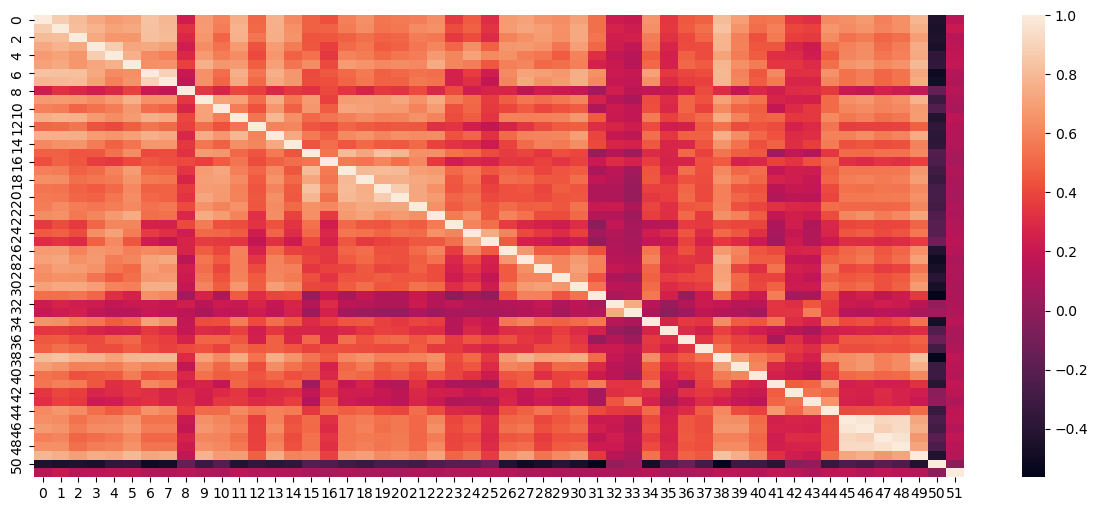

In [212]:
dft=df1.drop(['country', 'city'], axis=1)
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(dft)) #scaling the data
scaled_data
#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())


In [213]:
df1.describe(include='object').T

count unique            top freq
city     1634   1619       Santiago    2
country  1634    149  United States  199

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1634 entries, 0 to 4867
Data columns (total 54 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          1634 non-null   object 
 1   country       1634 non-null   object 
 2   x1            1634 non-null   float64
 3   x2            1634 non-null   float64
 4   x3            1634 non-null   float64
 5   x4            1634 non-null   float64
 6   x5            1634 non-null   float64
 7   x6            1634 non-null   float64
 8   x7            1634 non-null   float64
 9   x8            1634 non-null   float64
 10  x9            1634 non-null   float64
 11  x10           1634 non-null   float64
 12  x11           1634 non-null   float64
 13  x12           1634 non-null   float64
 14  x13           1634 non-null   float64
 15  x14           1634 non-null   float64
 16  x15           1634 non-null   float64
 17  x16           1634 non-null   float64
 18  x17           1634 non-null   flo

In [ ]:
#renaming the columns for easier reference
categorical_cols = ['city', 'country']
df1.rename(columns={'x1': 'meal', 'x3': 'Mcmeal',  'x4': 'beer1', 'x5': 'beer2',  'x6': 'cpch',  'x7': 'coke',  'x8': 'water', 'x9': 'milk', 'x10': 'bread', 'x11': 'rice', 'x12': 'eggs', 'x13': 'cheese', 'x14': 'chicken', 'x15': 'beef', 'x16': 'apples', 'x17': 'banana', 'x18': 'orange', 'x19': 'tomato', 'x20': 'potato', 'x21': 'onion', 'x22': 'lettuce', 'x23': 'water2', 'x24': 'wine', 'x25': 'beer3', 'x26': 'beer4', 'x27': 'cigar', 'x28': 'ticket', 'x29': 'mthpass', 'x30': 'taxi', 'x31': 'taxi1',  'x33': 'gas', 'x34': 'volk',  'x35': 'toyota',  'x32': 'taxi2', 'x36': 'utilities', 'x37': 'mobile', 'x38': 'internet', 'x39': 'gym', 'x40': 'tennis', 'x41': 'cinema', 'x42': 'prek', 'x43': 'school', 'x44': 'jeans', 'x45': 'dress', 'x46': 'nike', 'x47': 'leather', 'x48': 'apt1in', 'x49': 'apt1out', 'x50': 'apt3in', 'x51': 'apt3out', 'x52': 'resqin', 'x53': 'resqout', 'x54': 'salary', 'x55': 'mrate', 'x2': 'meal2' }, inplace=True)
numerical_cols=df1.select_dtypes(include='number')

In [170]:
df=df1.copy()

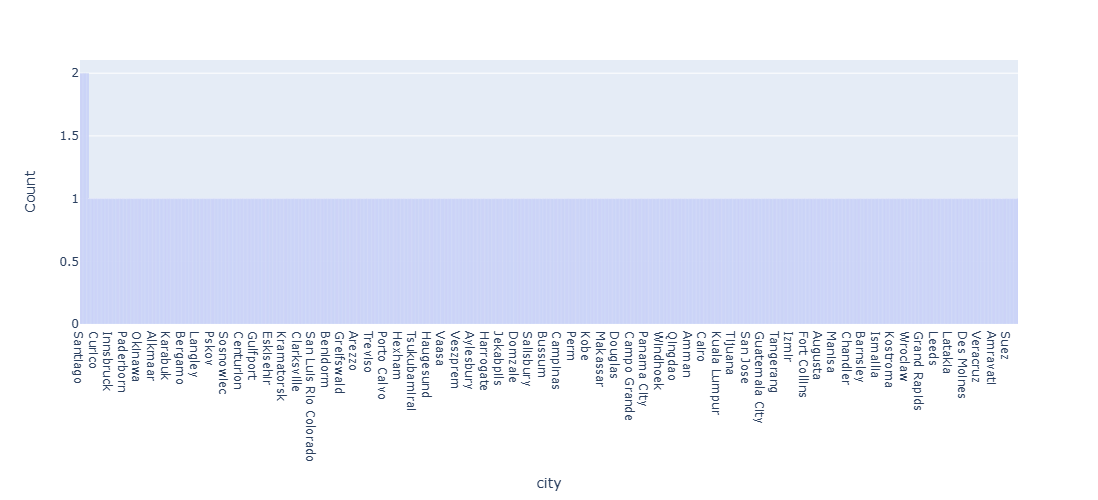

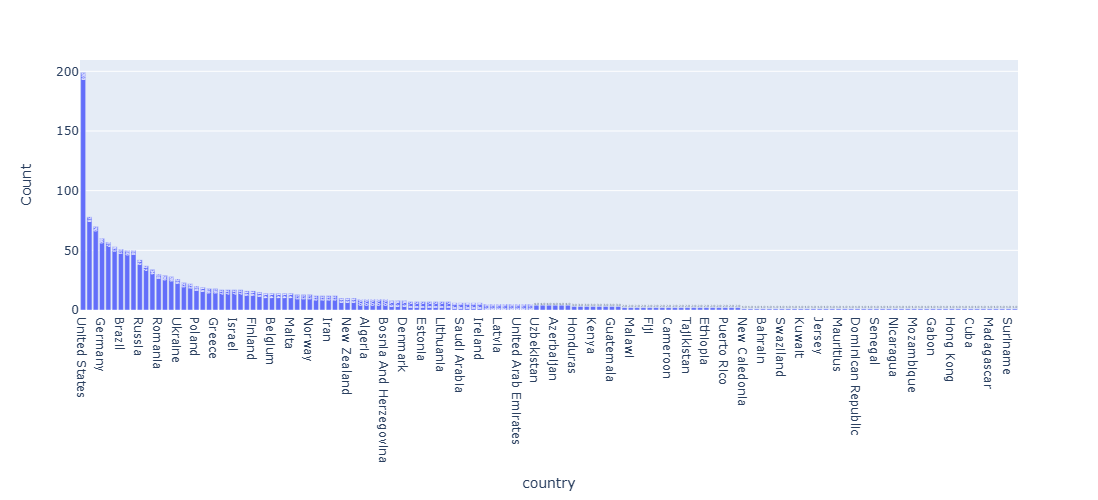

In [171]:
# Data visualization
import plotly.express as px
for col in categorical_cols:
  vals = df[col].value_counts()
  fig = px.bar(
        df, x=vals.index, y=vals.values,
        #title = f'{col} distribution',
        text_auto='.2s',
        height=500
    )
  fig.update_xaxes(title_text=col)
  fig.update_yaxes(title_text='Count')
  fig.update_layout(title_x=0.5)
  fig.show()
  #Most of the cities just have one record, per country

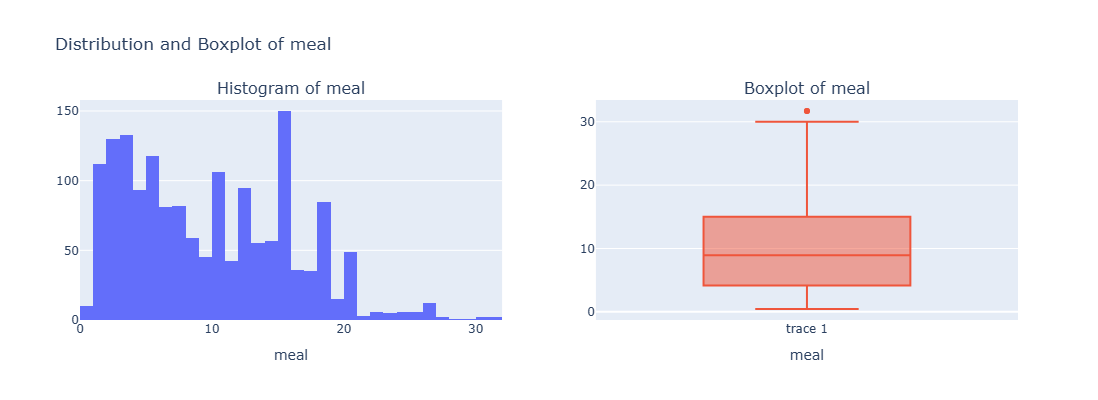

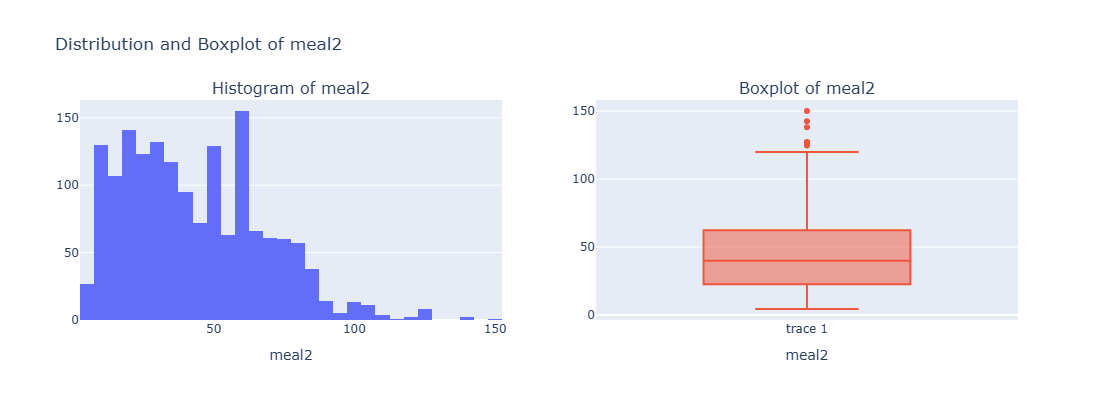

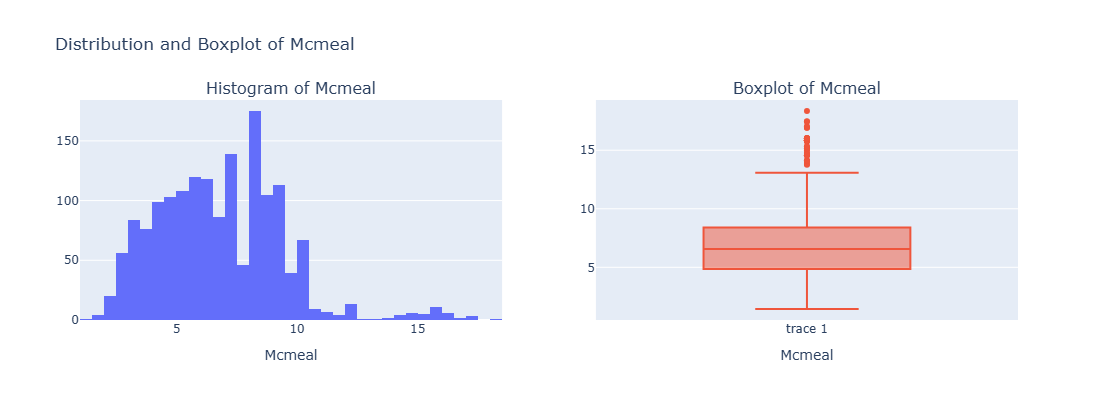

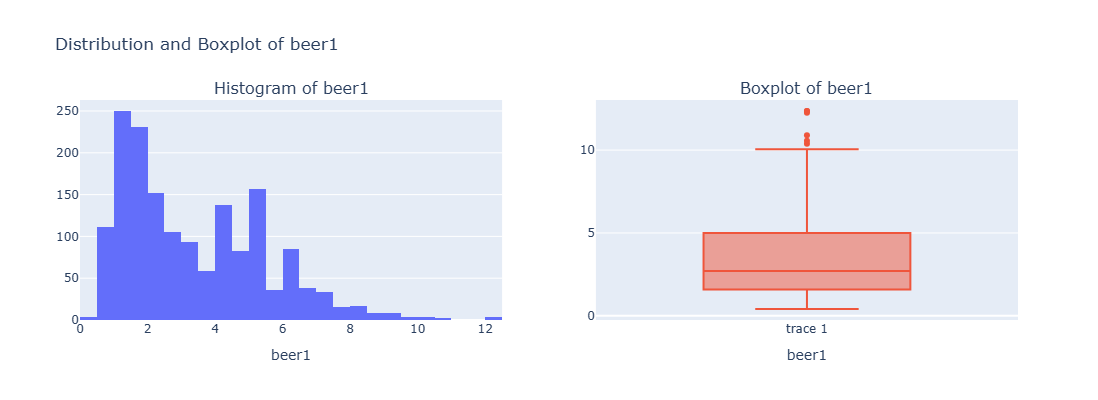

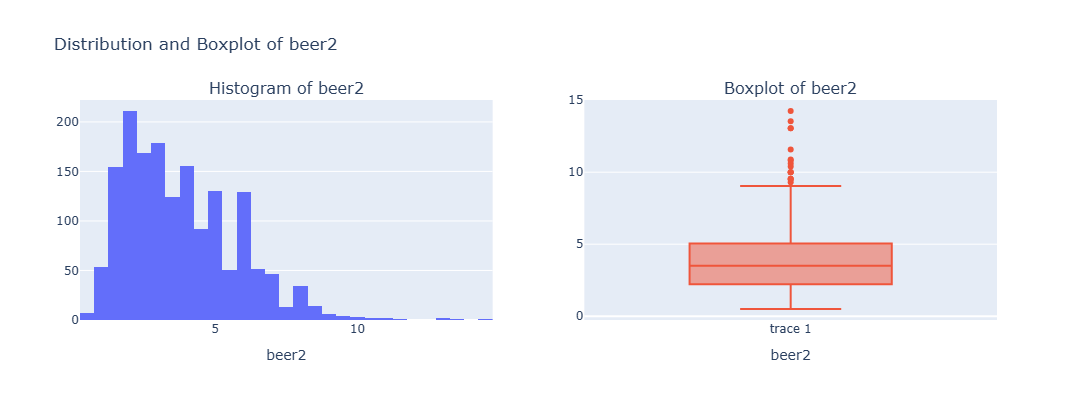

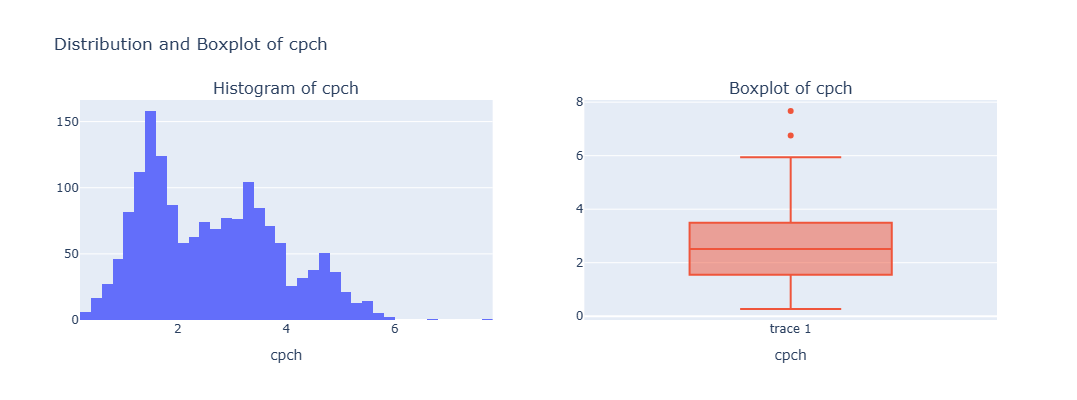

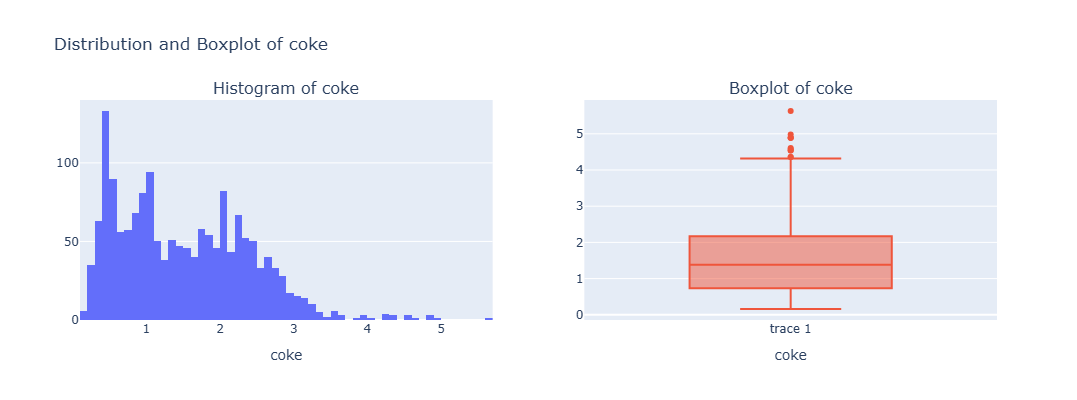

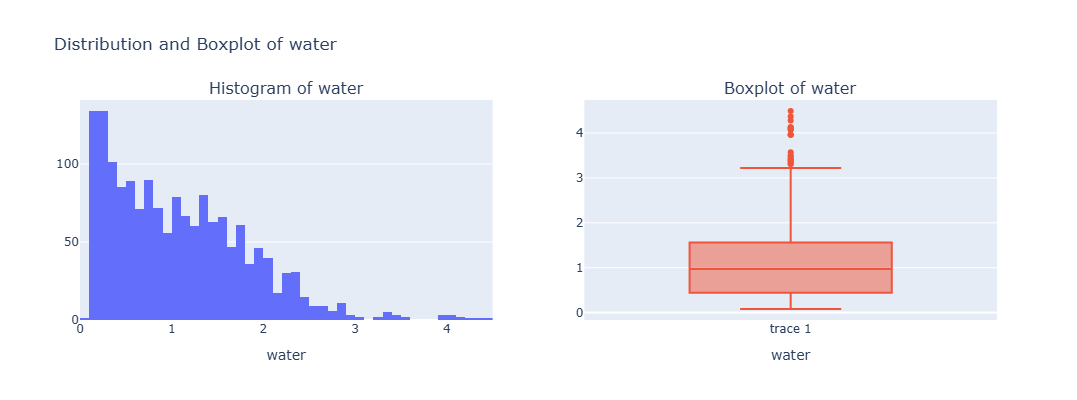

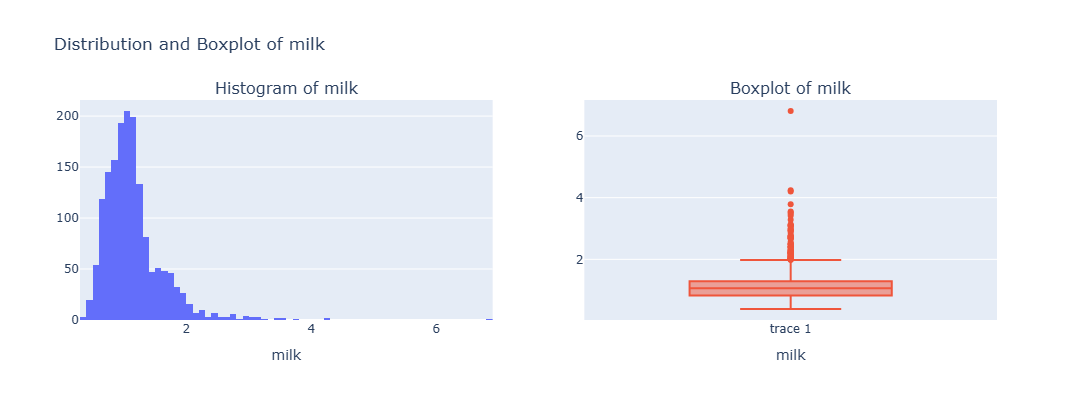

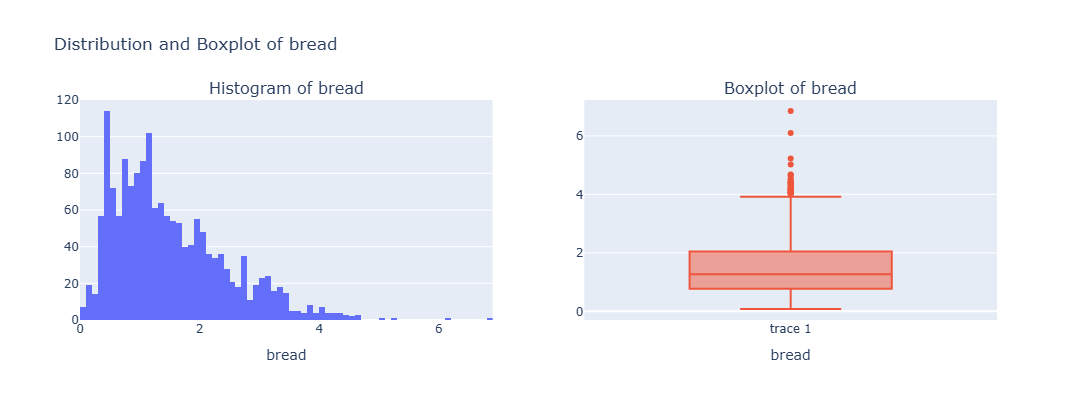

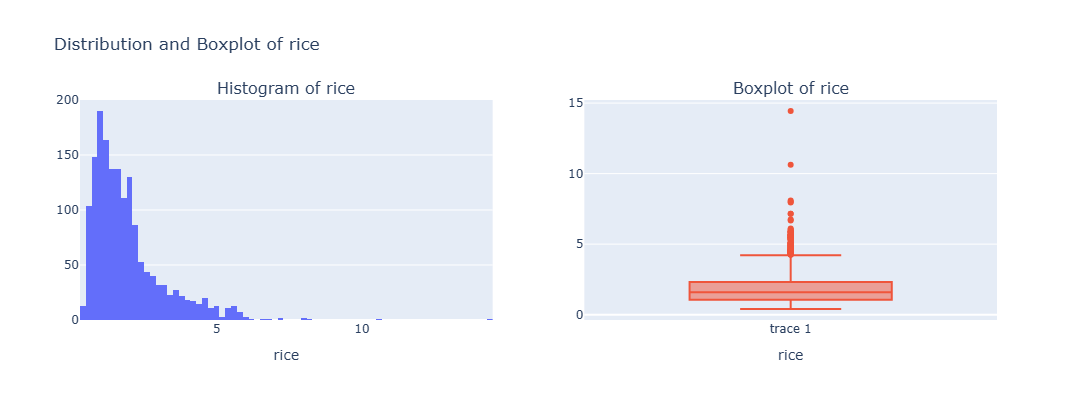

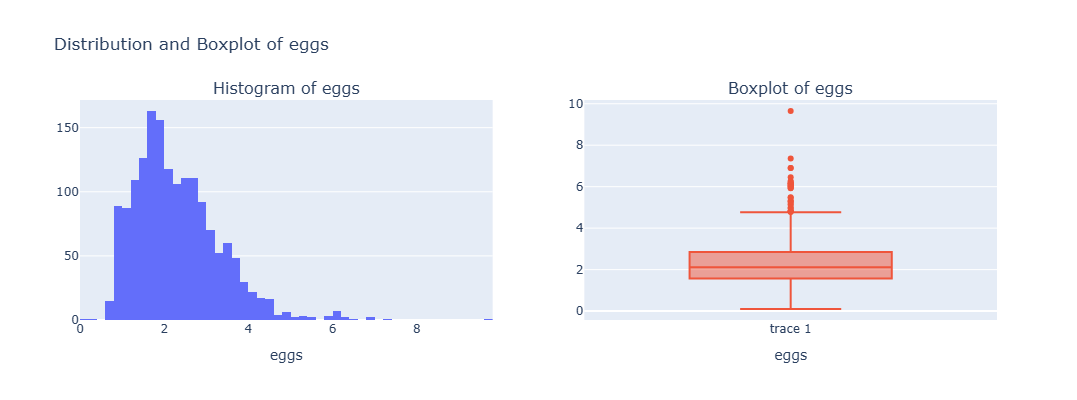

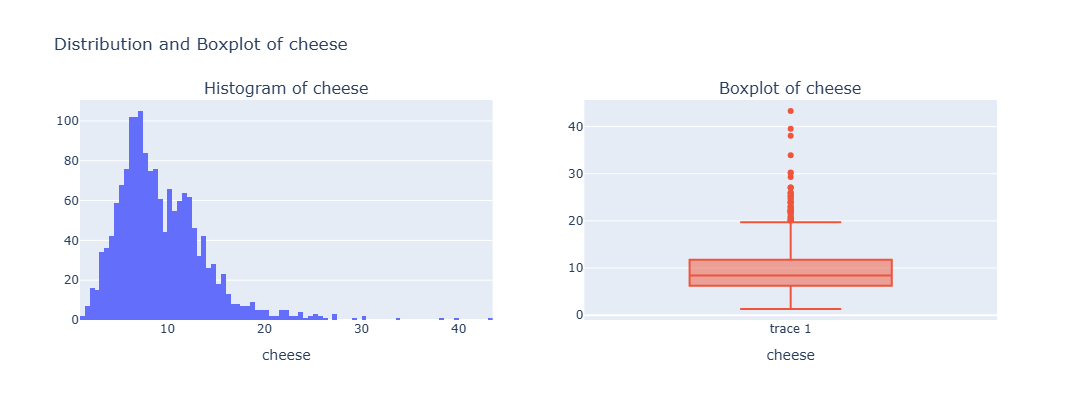

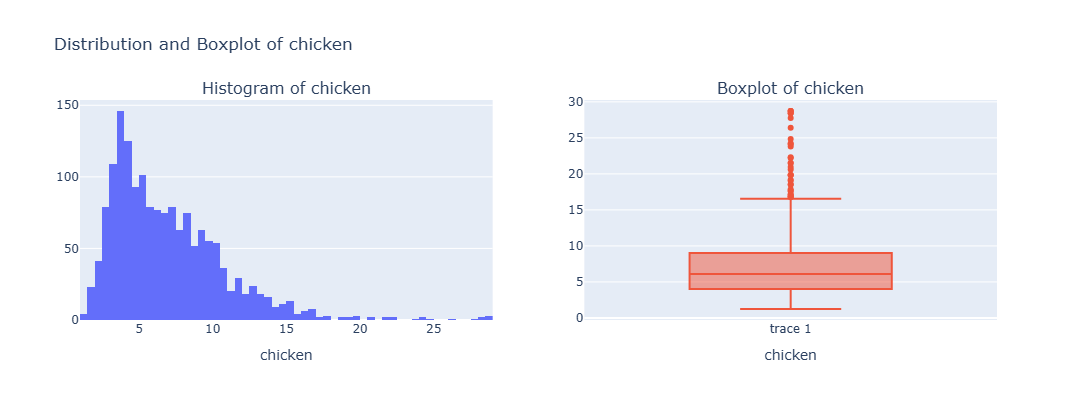

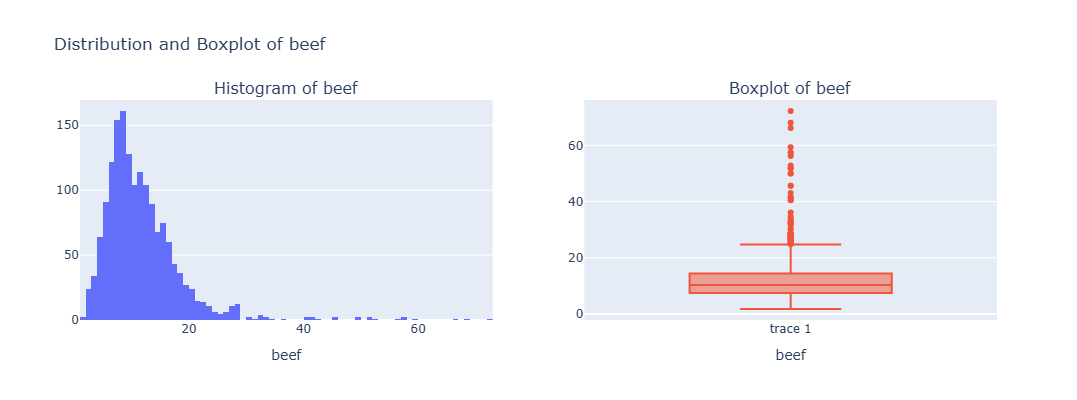

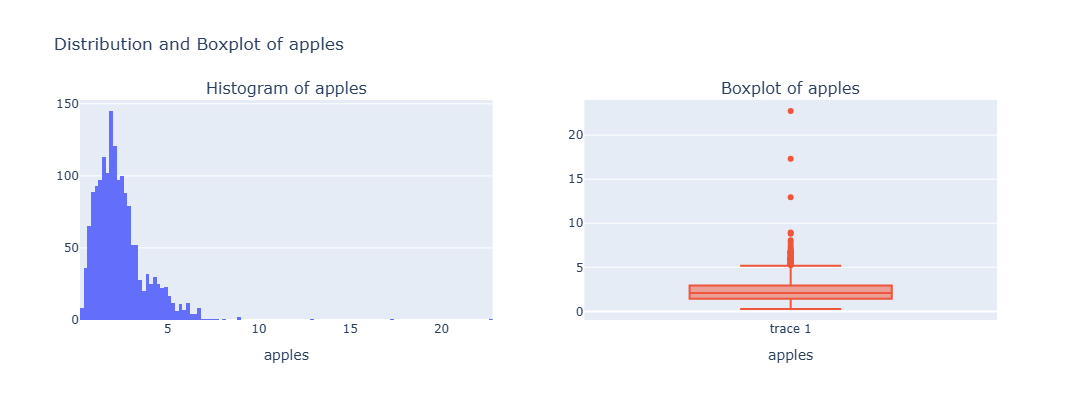

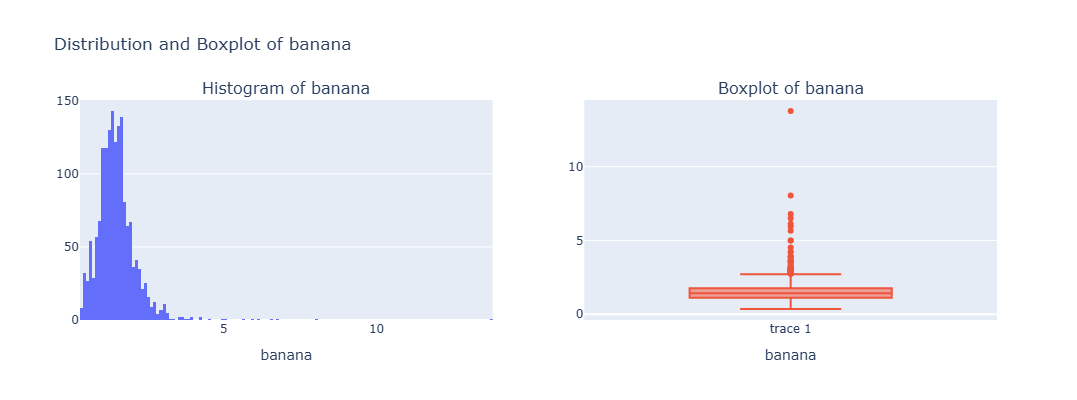

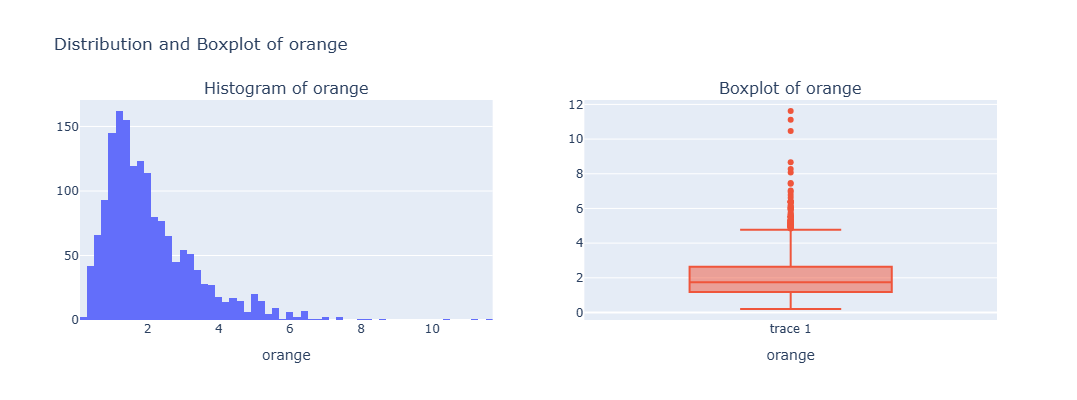

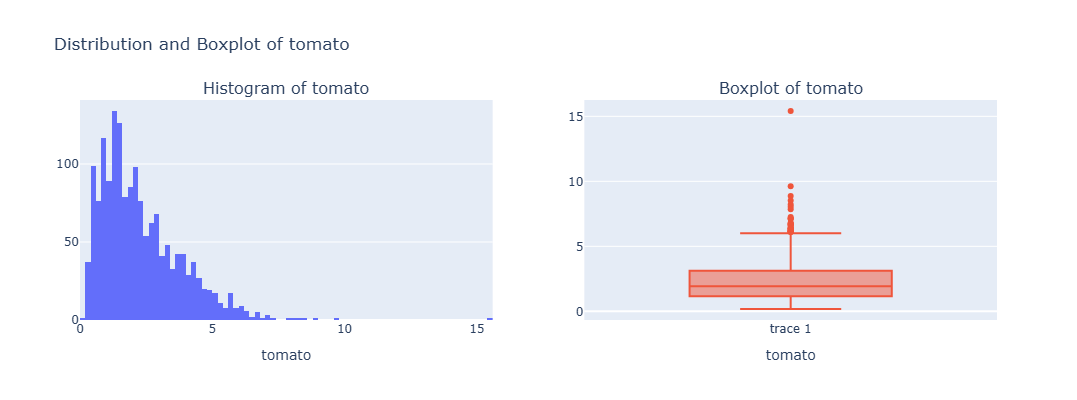

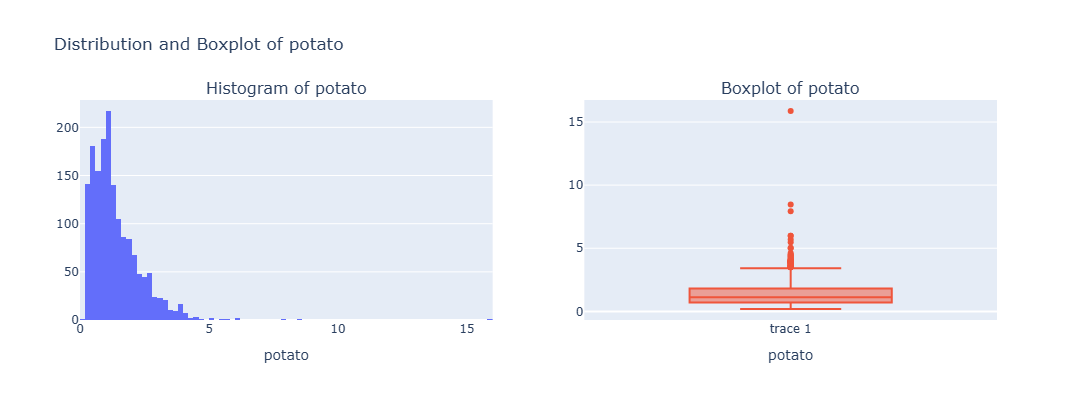

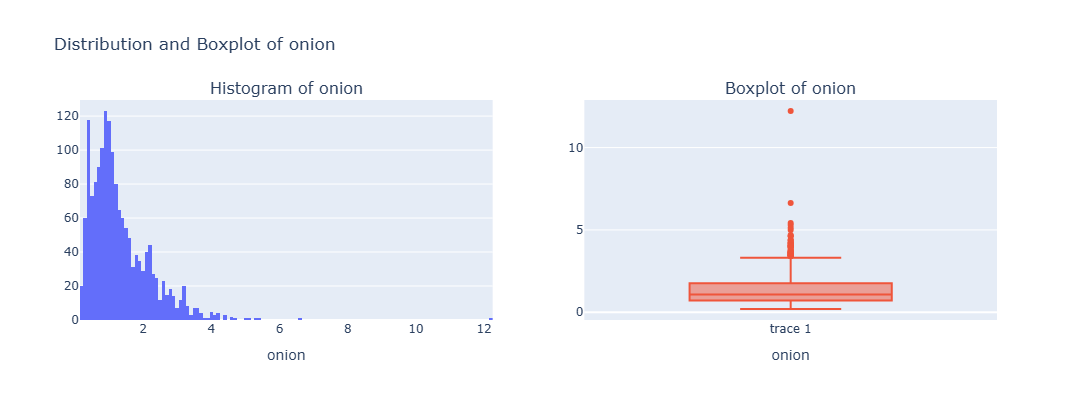

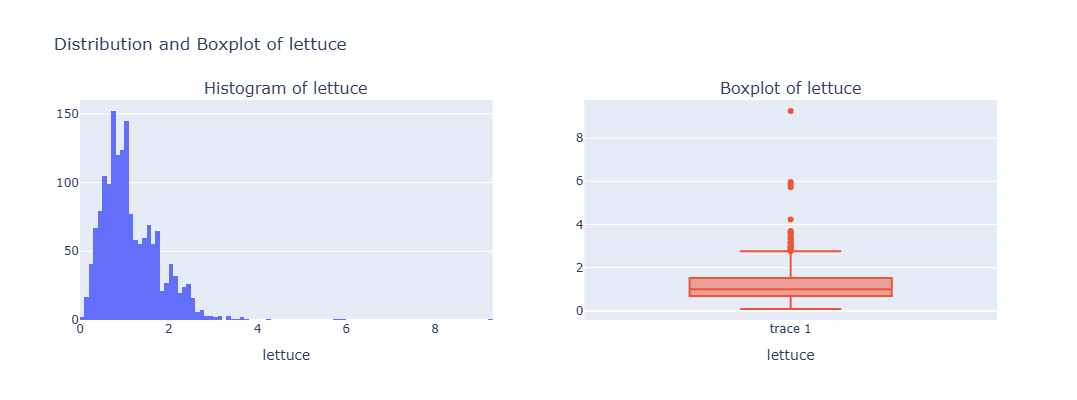

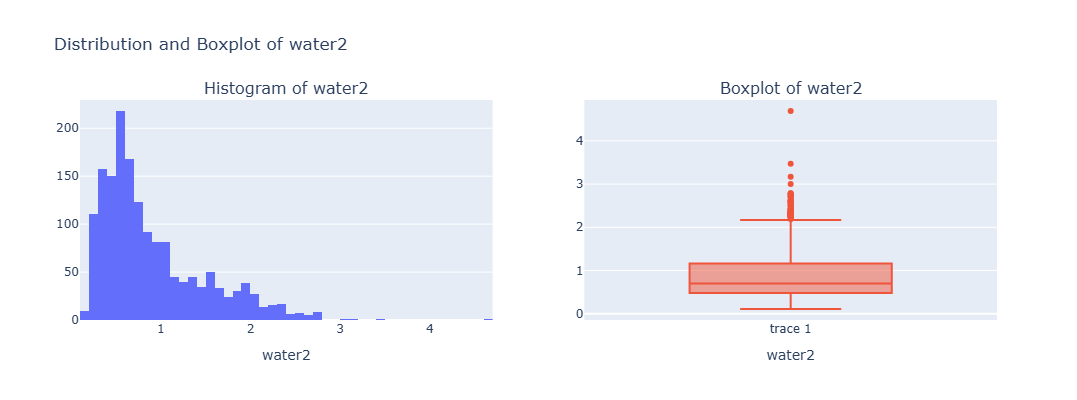

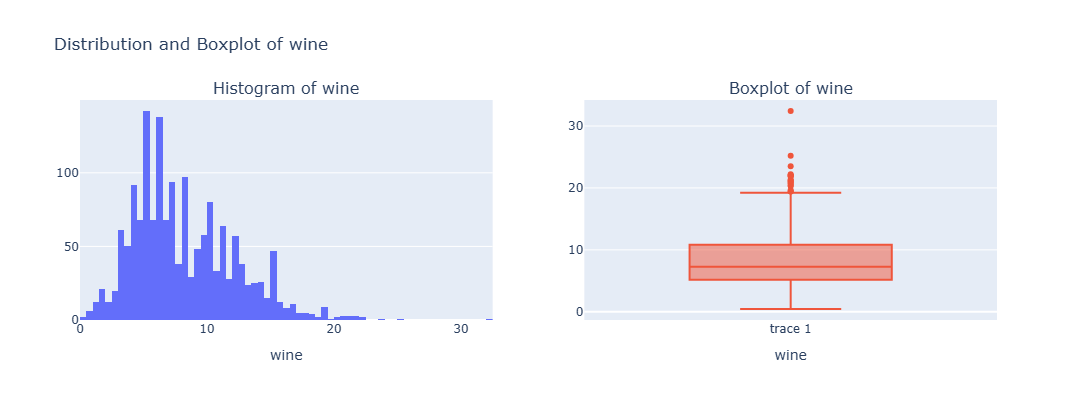

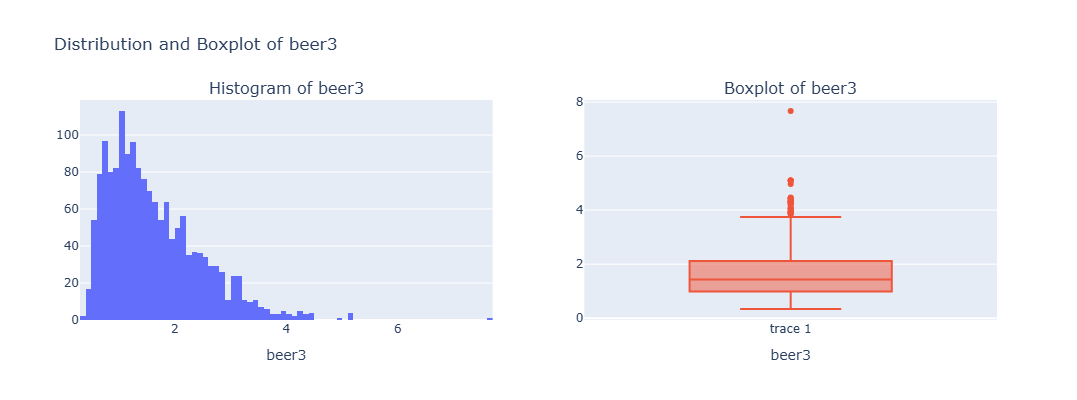

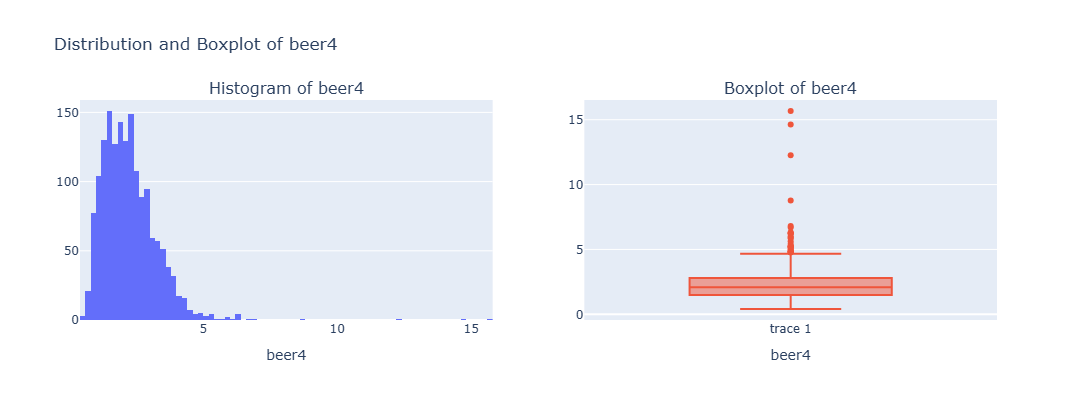

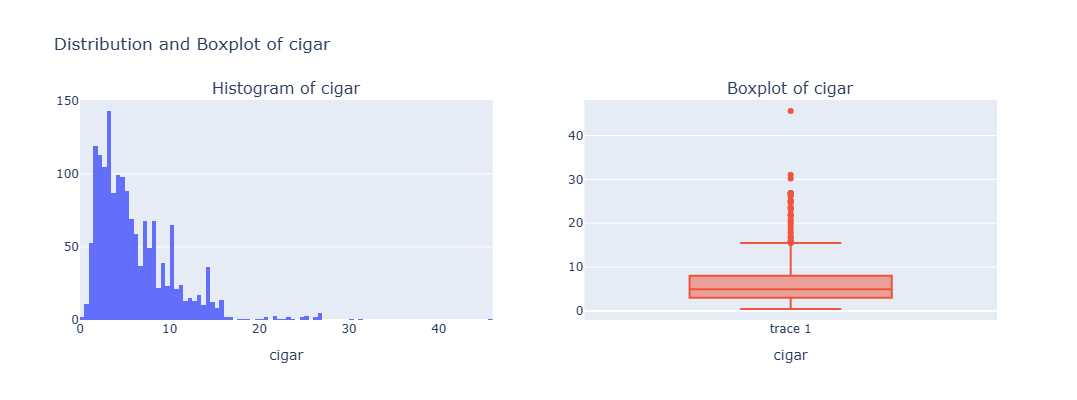

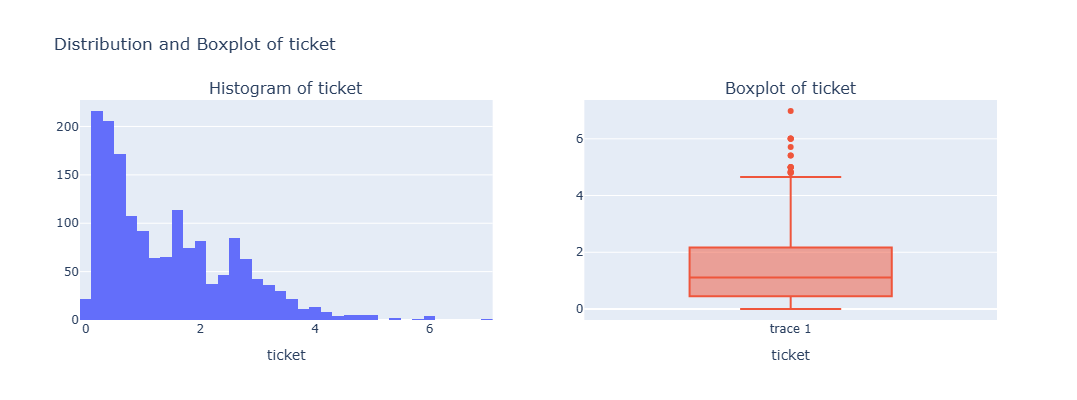

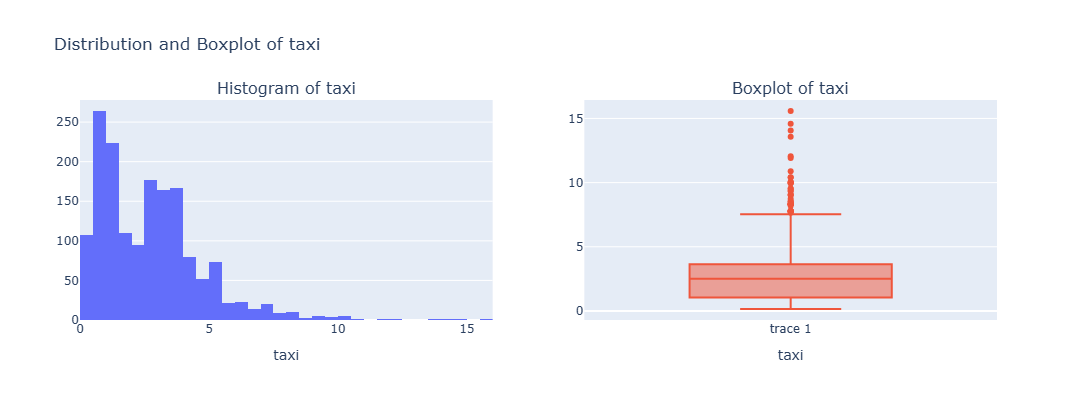

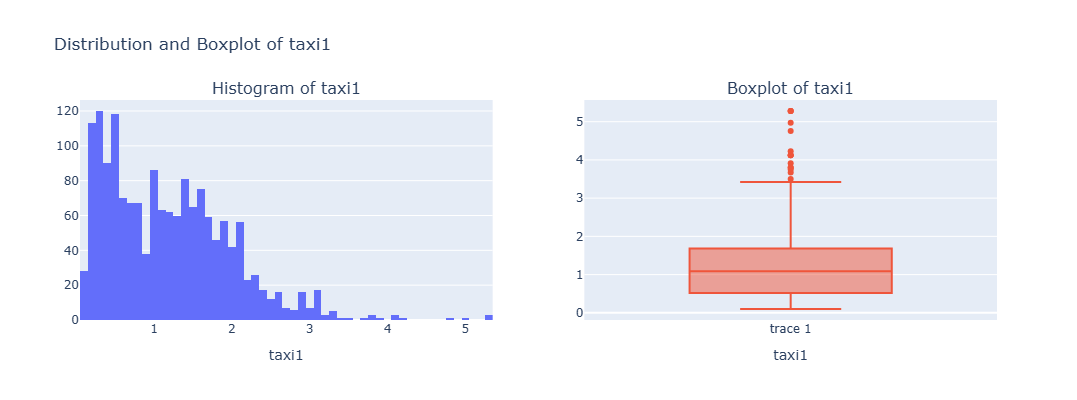

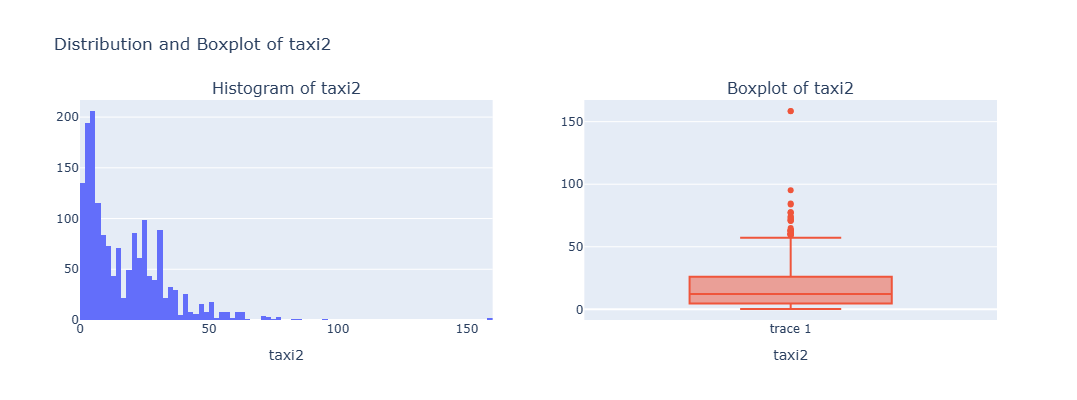

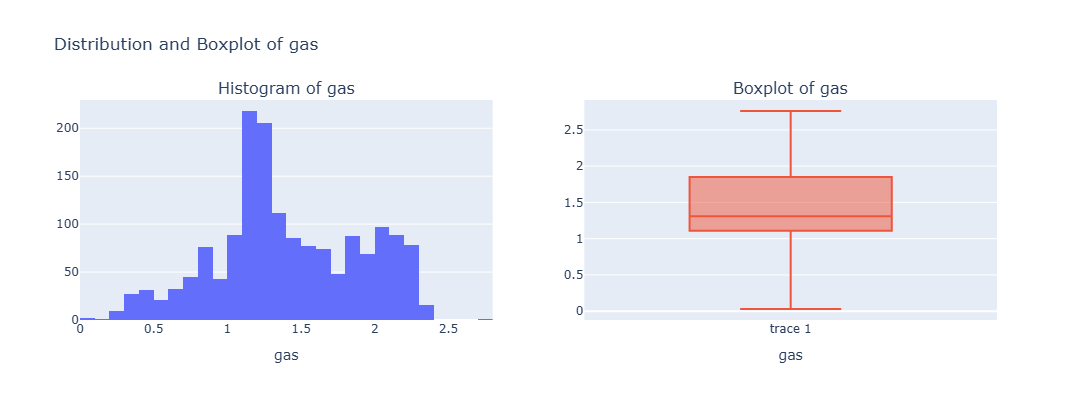

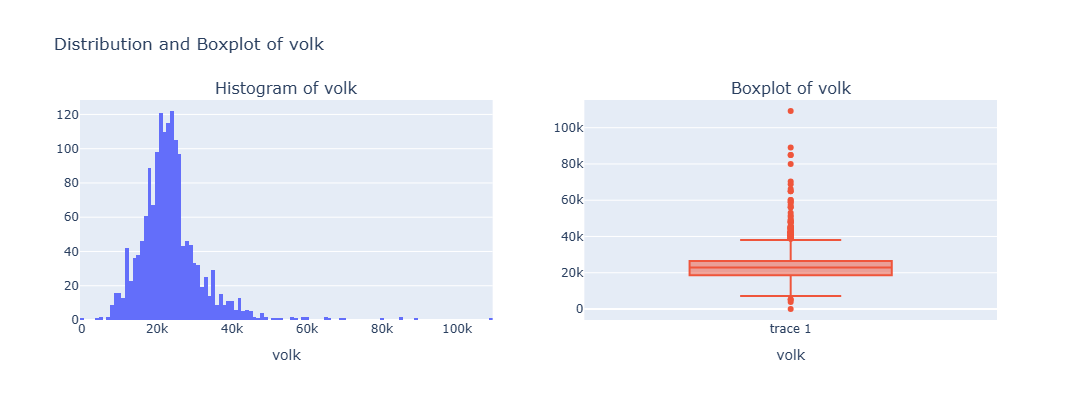

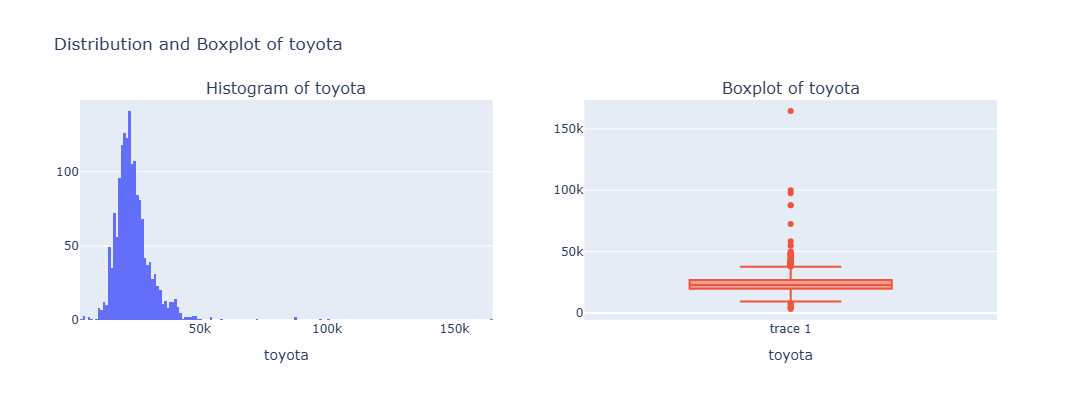

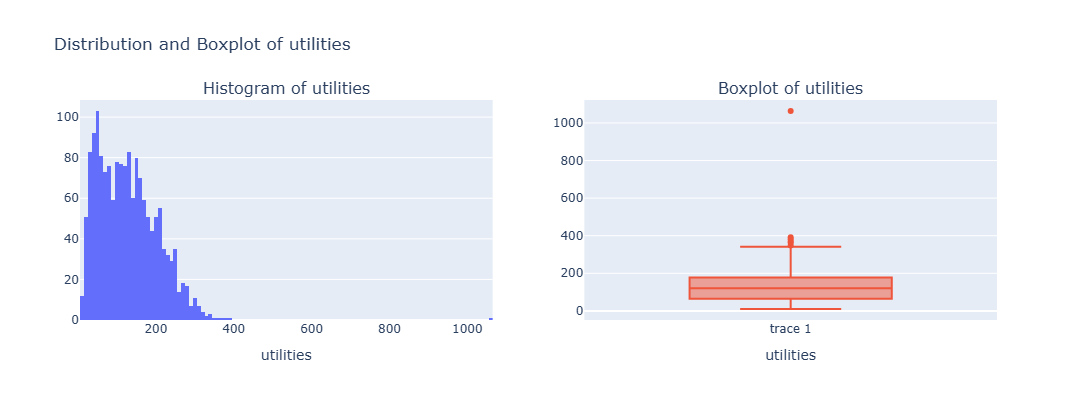

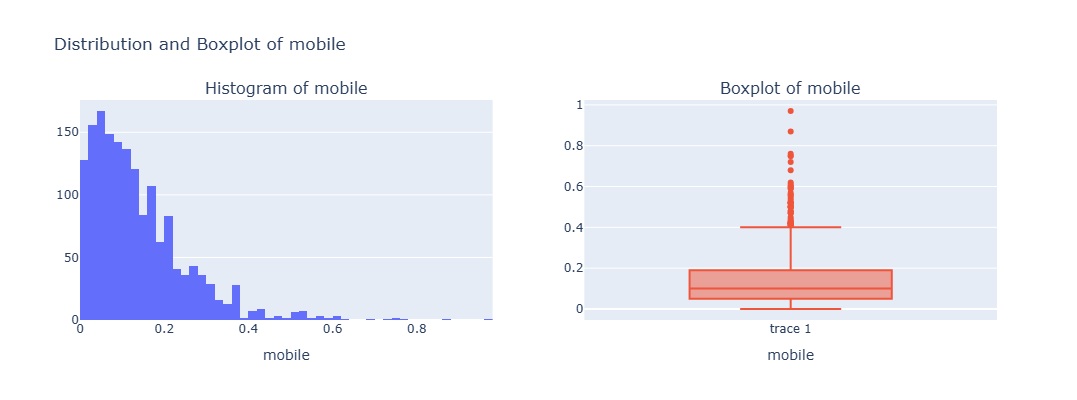

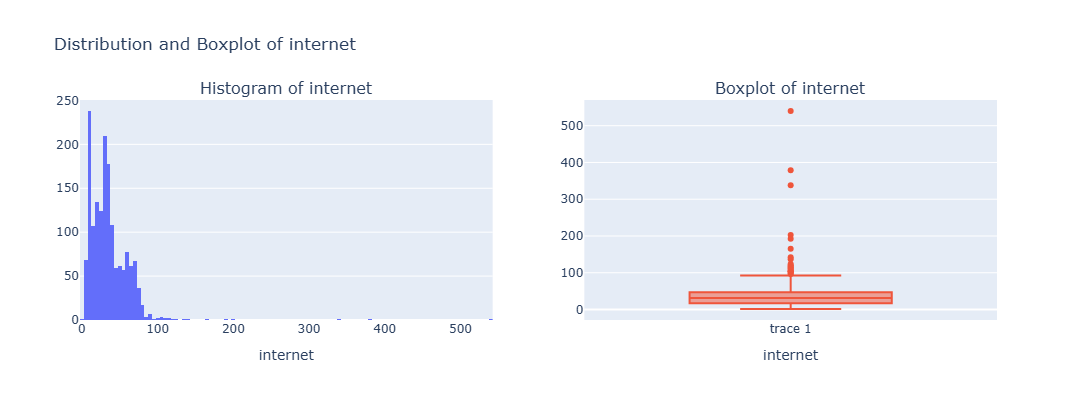

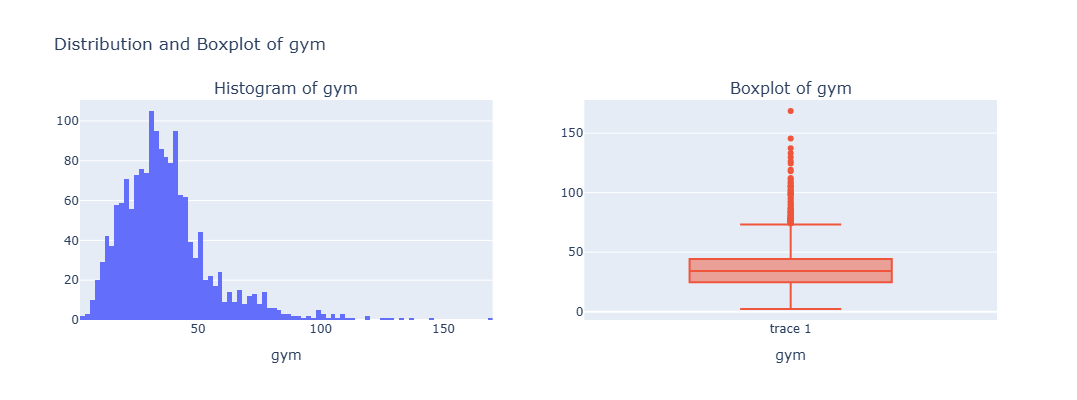

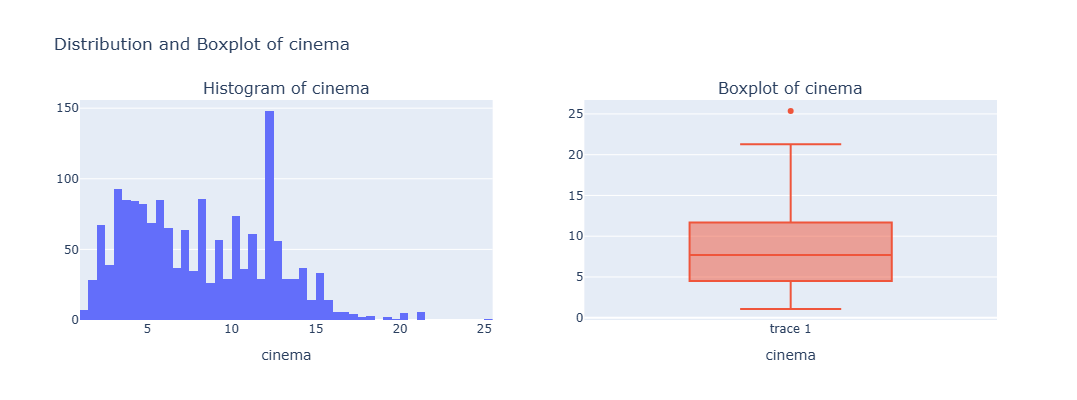

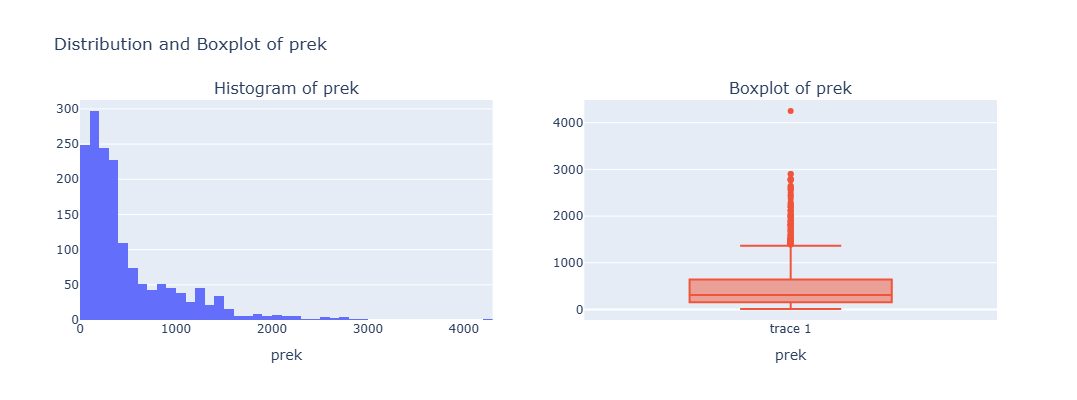

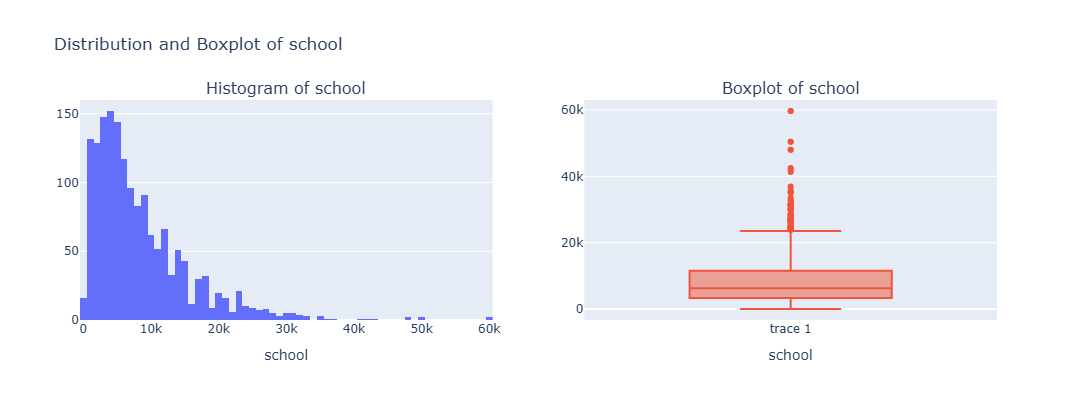

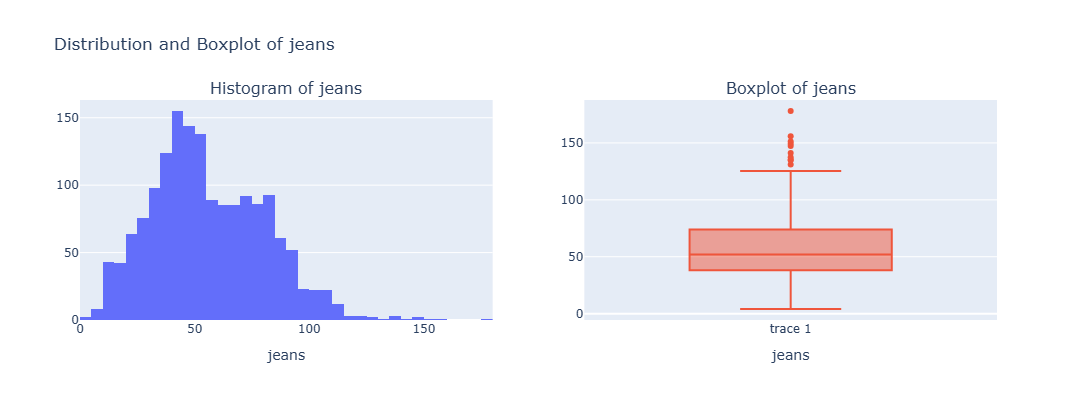

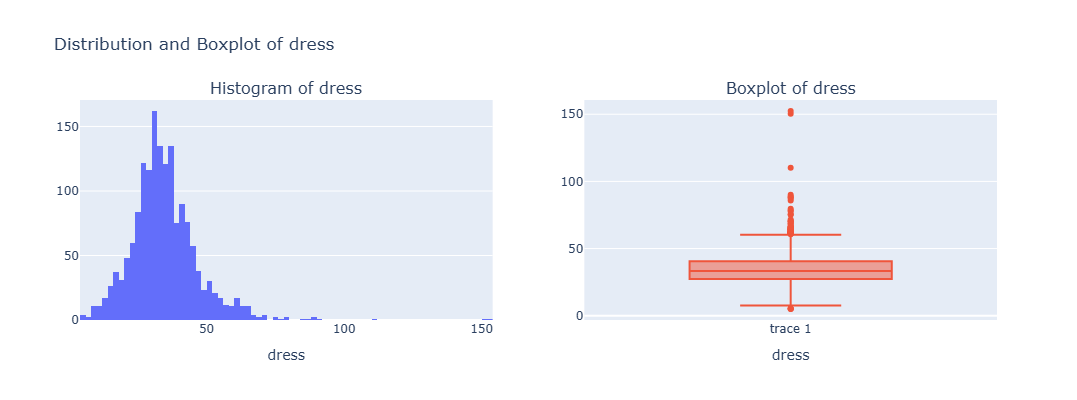

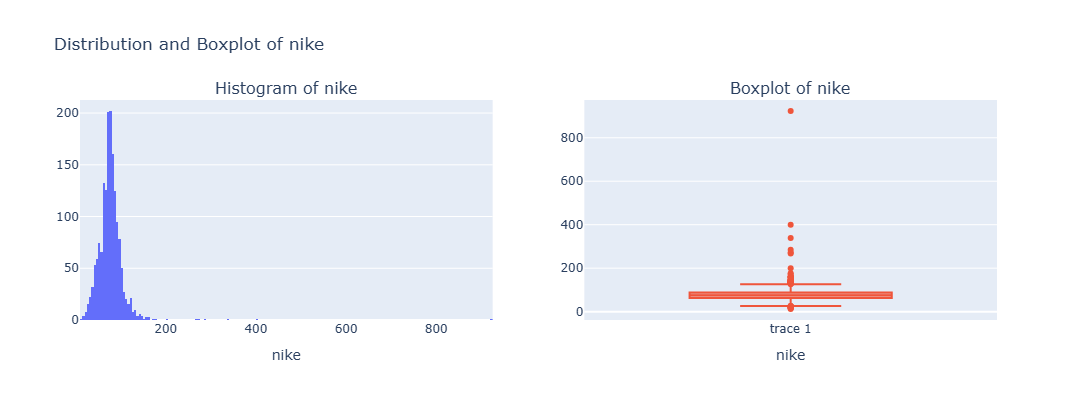

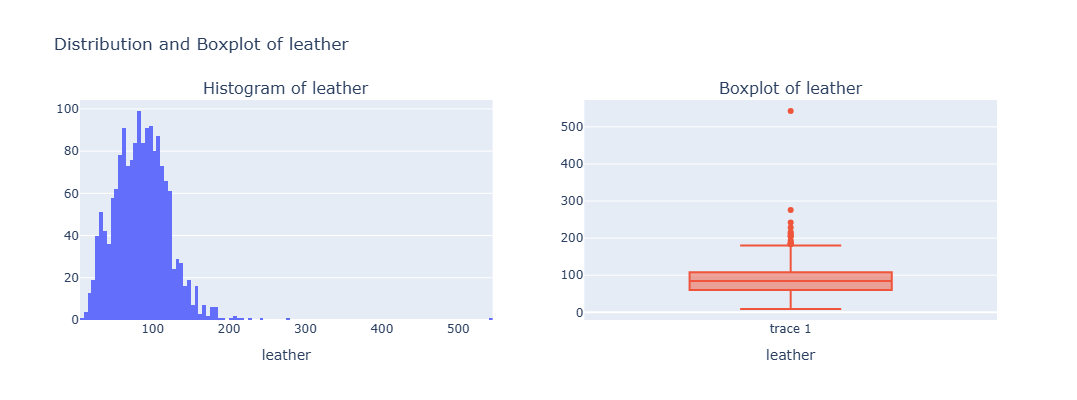

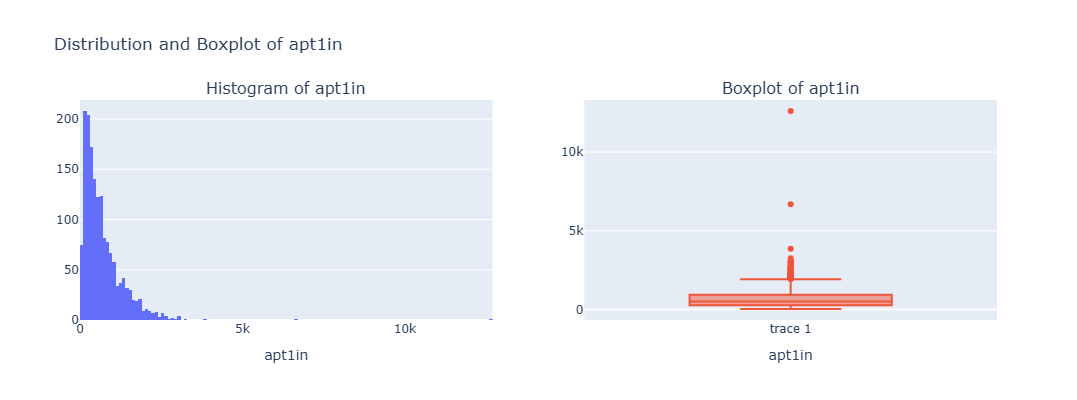

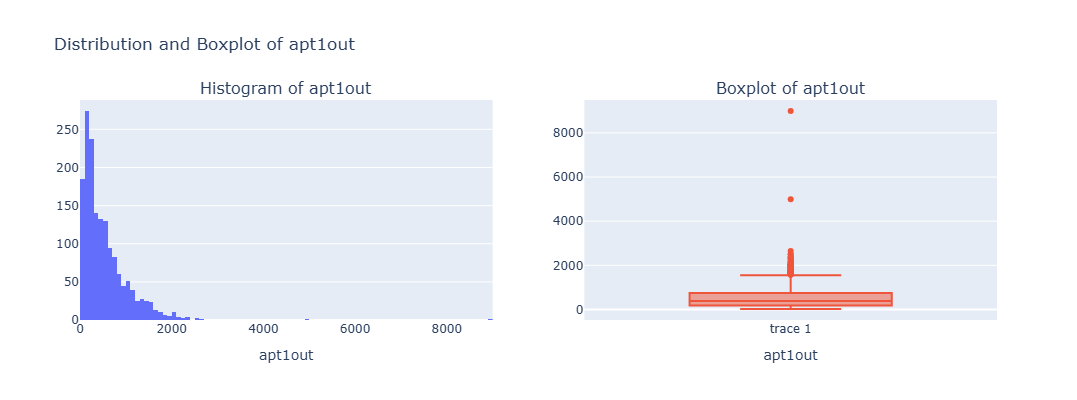

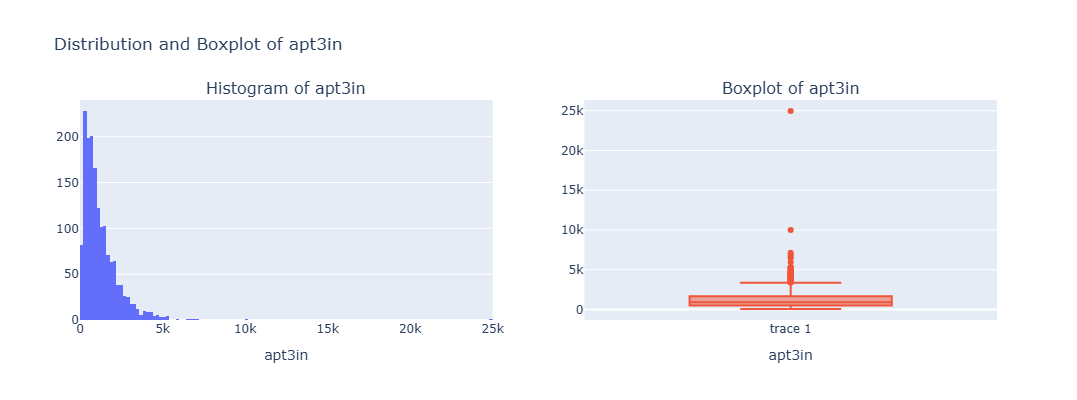

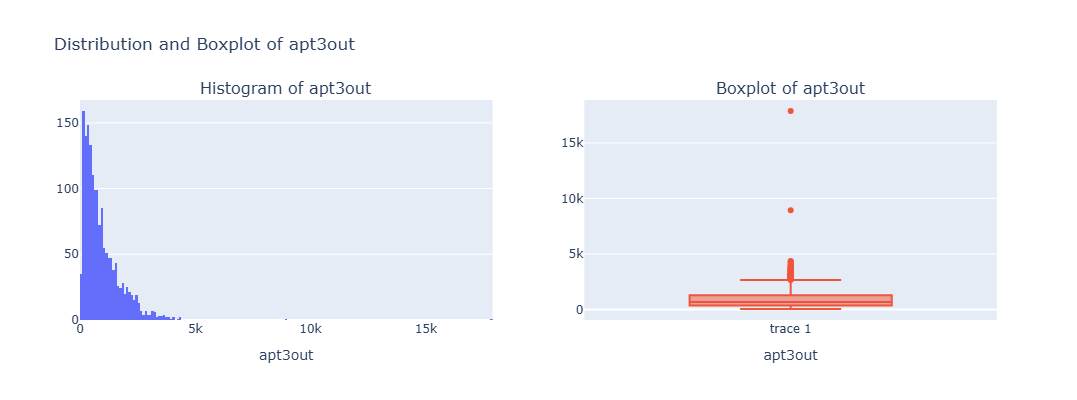

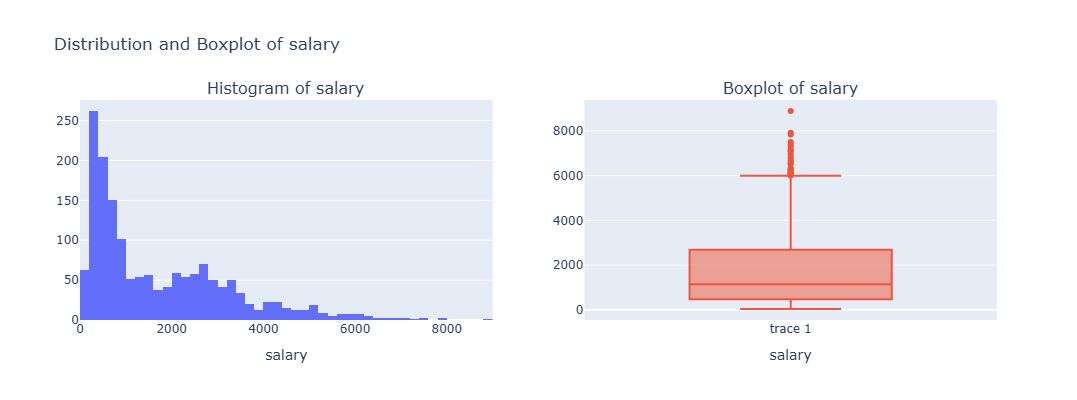

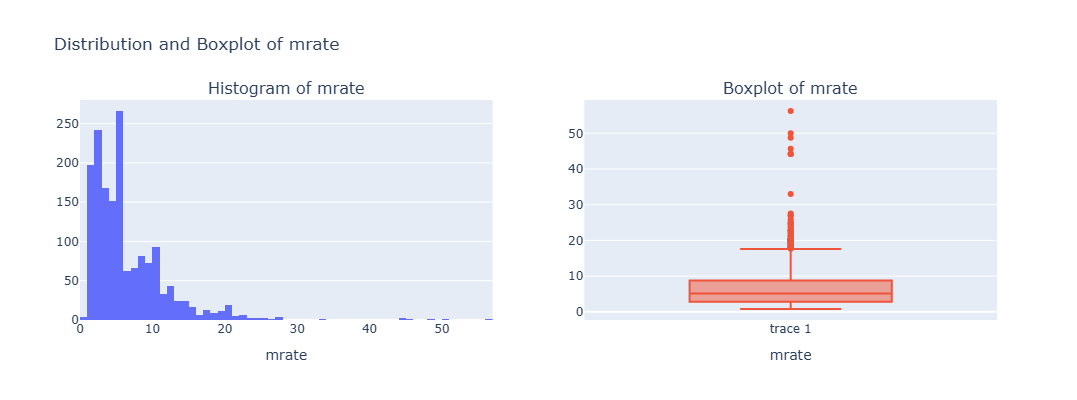

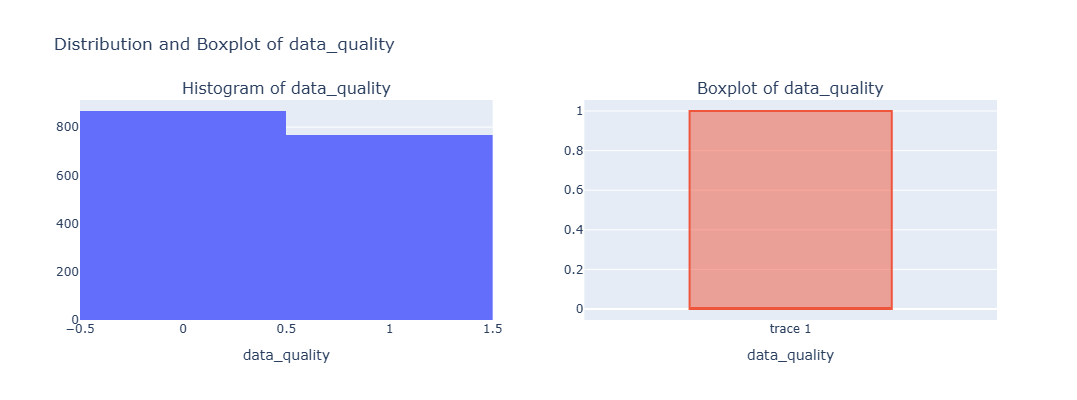

In [172]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
for col in numerical_cols:
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=(f'Histogram of {col}', f'Boxplot of {col}'))

    fig.add_trace(
        go.Histogram(x=df[col]),
        row=1, col=1
    )

    # Boxplot
    fig.add_trace(
        go.Box(y=df[col]),
        row=1, col=2
    )

    # Update layout
    fig.update_layout(
        width=800, height=400, title_text=f'Distribution and Boxplot of {col}', showlegend=False)

    fig.update_xaxes(title_text= col, row=1, col=1)
    fig.update_xaxes(title_text= col, row=1, col=2)

    fig.show()

    # Distribution of expenses appears normal, scewed to the left
    # Some outliers but not many
    #

Using PCA to reduce dimensions to two principal components. Applying PCA for clustering.

In [174]:
dfr=pd.DataFrame(columns=['Category', 'Mean', '25%', '75%'])

for col in numerical_cols:
    q75 = np.nanpercentile(df1[col],75)
    q25=np.nanpercentile(df1[col],25)
    new_row={'Category':col, 'Mean': df1[col].mean(), '25%':q25, '75%':q75}
    dfr.loc[len(dfr)]=new_row
pd.set_option('display.max_columns', None)
print(dfr)    


        Category          Mean         25%         75%
0           meal      9.716359      4.1500     15.0000
1          meal2     43.342081     22.6775     62.2725
2         Mcmeal      6.773231      4.8500      8.4025
3          beer1      3.335924      1.5800      5.0000
4          beer2      3.816610      2.2200      5.0450
5           cpch      2.618494      1.5525      3.4900
6           coke      1.500734      0.7300      2.1700
7          water      1.080814      0.4400      1.5600
8           milk      1.143091      0.8300      1.2900
9          bread      1.507827      0.7700      2.0475
10          rice      1.926891      1.0500      2.3175
11          eggs      2.291126      1.5700      2.8500
12        cheese      9.362570      6.2300     11.7500
13       chicken      6.950924      4.0100      9.0150
14          beef     11.808886      7.4125     14.4025
15        apples      2.413029      1.4300      2.9500
16        banana      1.502007      1.1100      1.7600
17        

In [177]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

X = df1.drop(['country', 'city'], axis=1)
y = df1['country']

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Splitting the data into four equally sized samples. First, break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

# DataFrame to store features and predicted cluster memberships
ypred = pd.DataFrame()


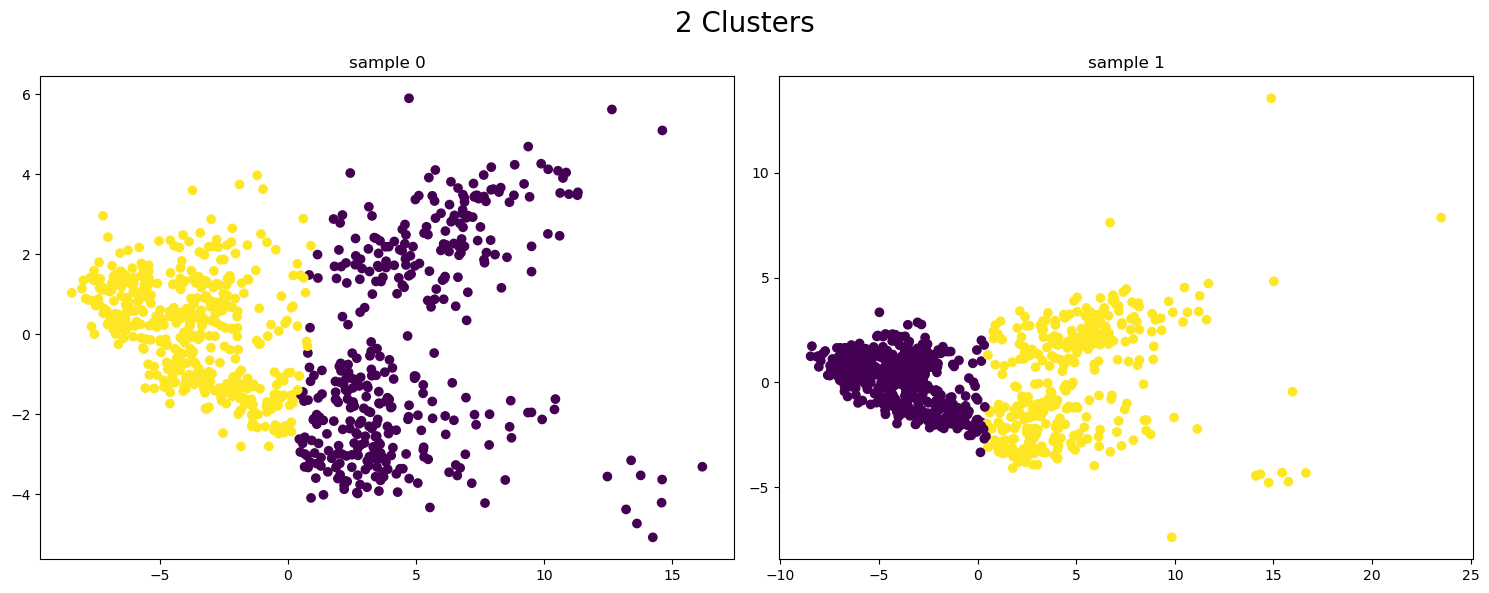

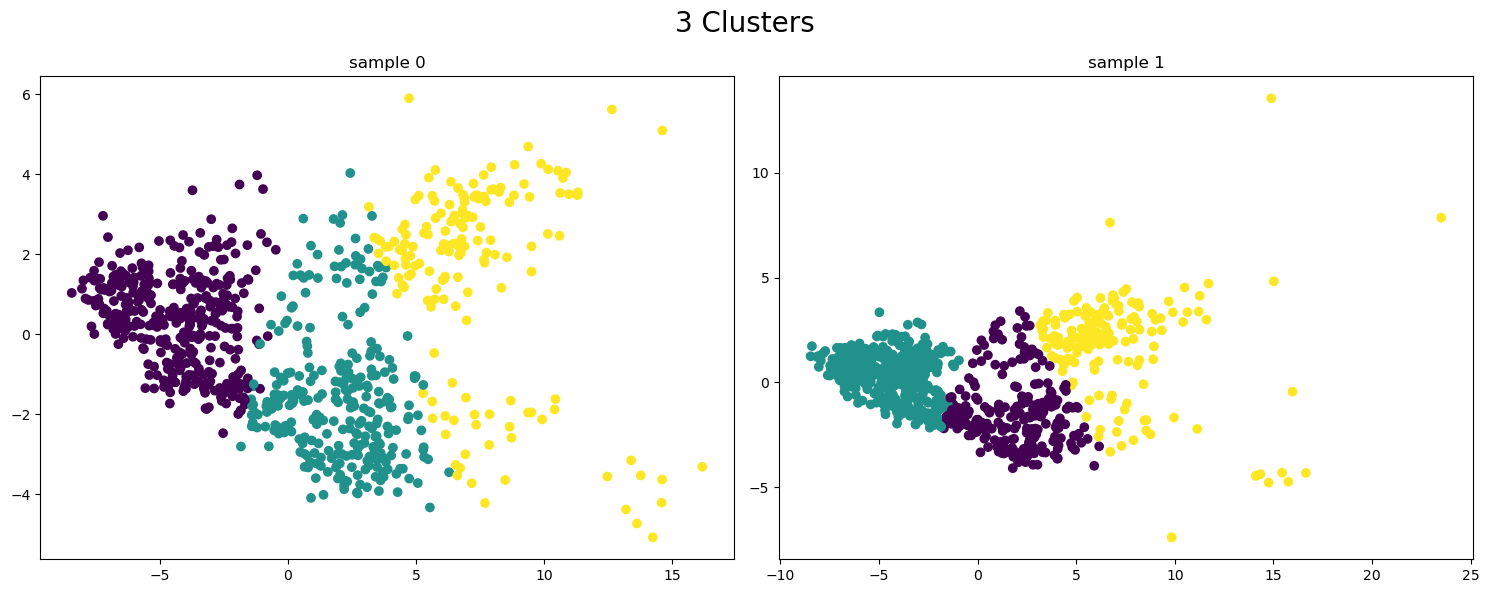

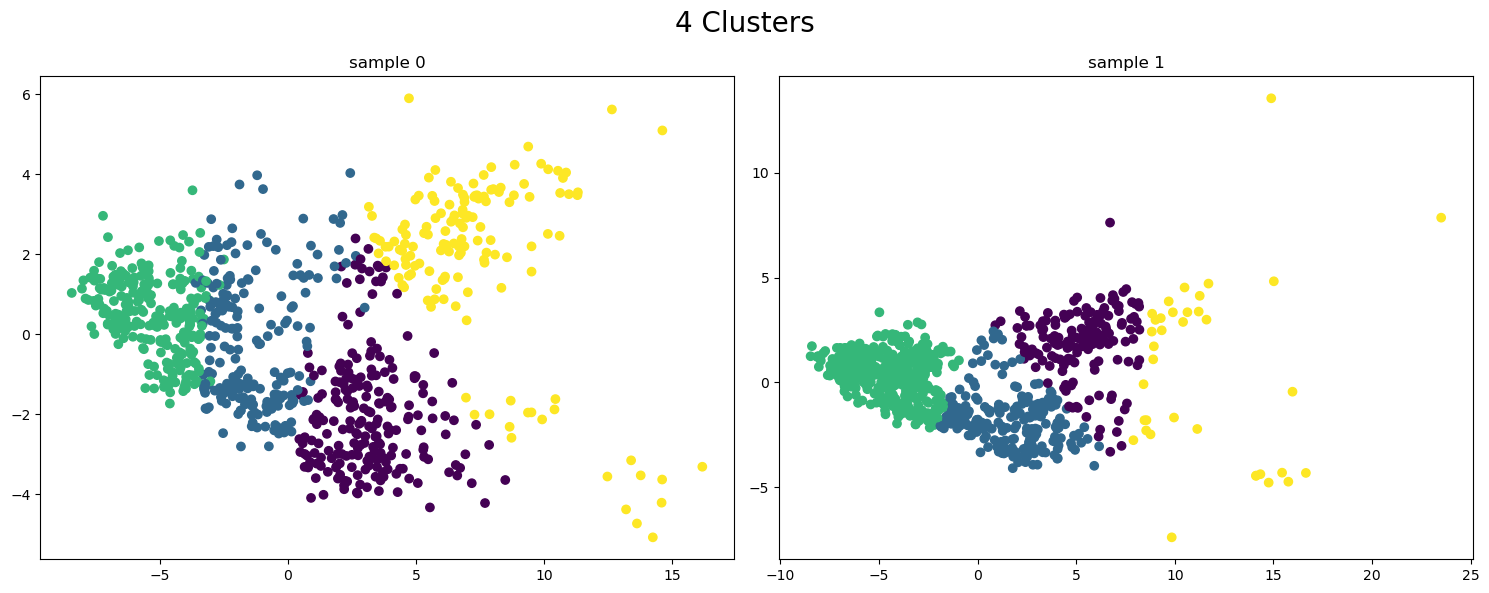

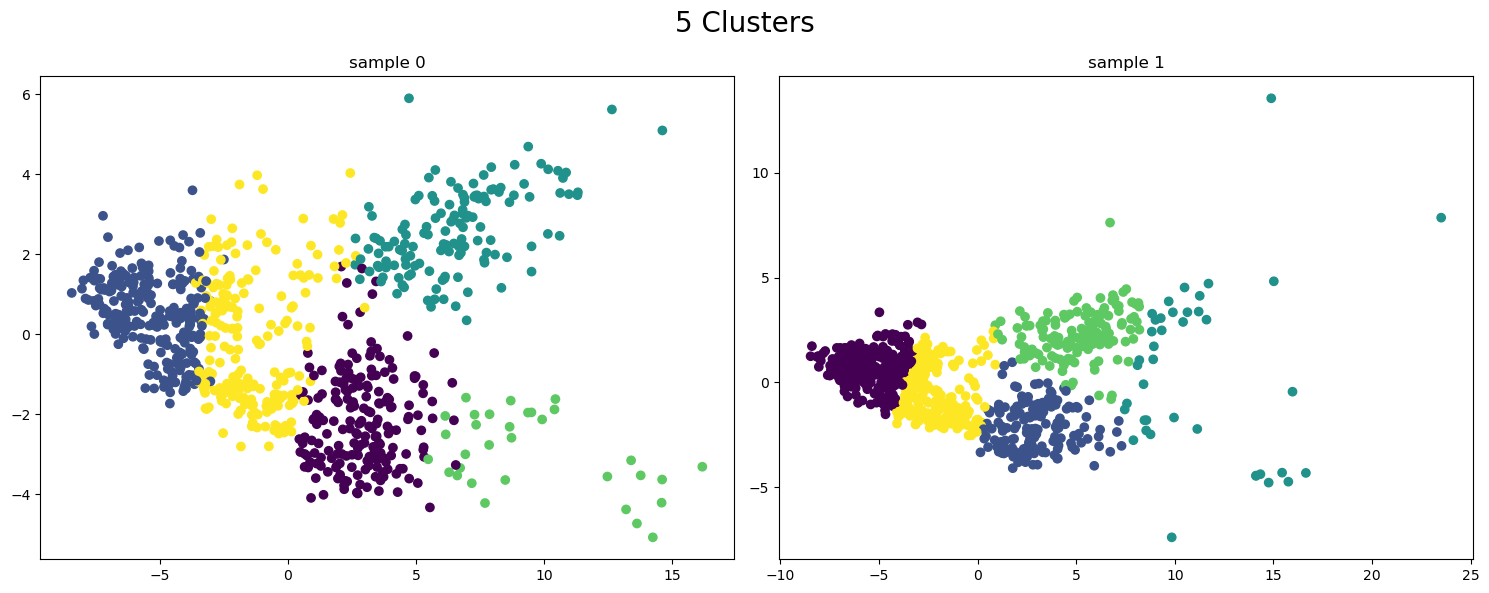

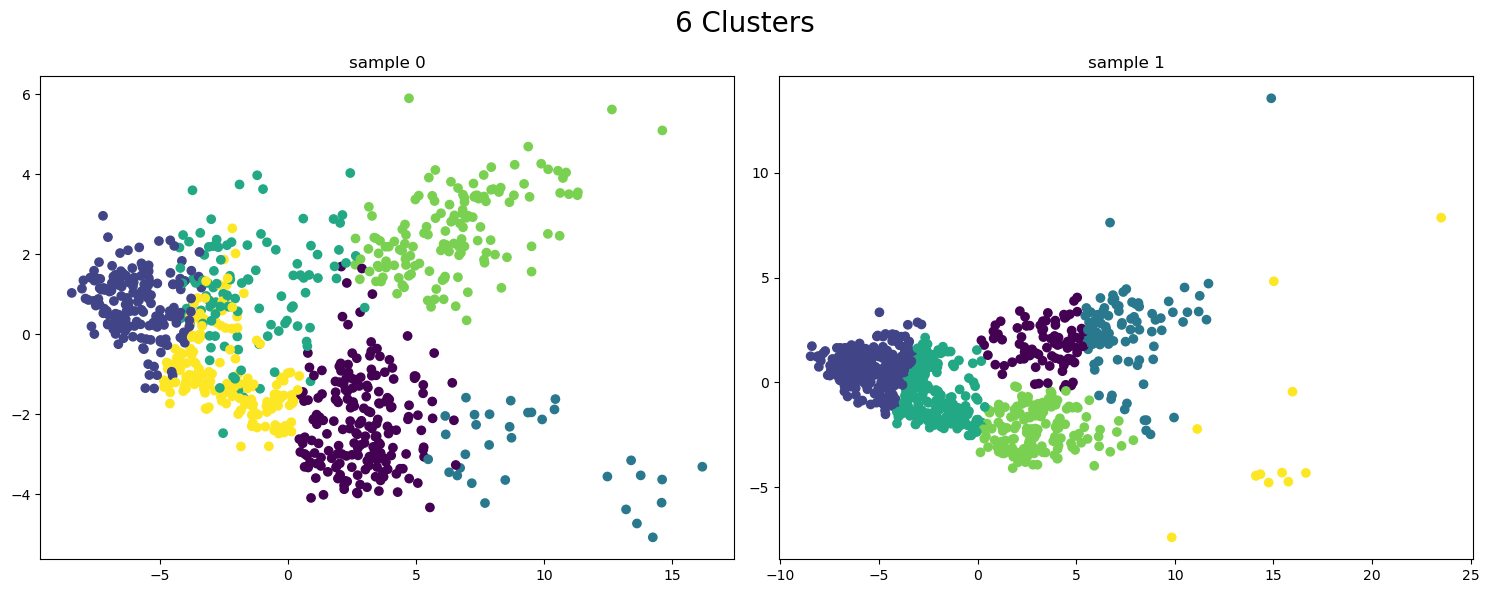

In [140]:
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into `ypred`
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2-4.
    for nclust in range(2, 7):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred


# For each  number of clusters, plot the clusters using the
# PCA features for each sample
for cluster in range(2, 7):
    
    # Make a grid of subplots
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample
    for i in range(2):
        
        # PCA-created features
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')



In [179]:
# Get predicted clusters
full_pred = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
dfr=pd.crosstab(y,full_pred) 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(dfr)
#table shows that different cities within a country can belong to different clusters

col_0                    0   1    2   3
country                                
Albania                  0   7    0   0
Algeria                  0   9    0   0
Angola                   1   0    0   0
Argentina                0   8    0   0
Armenia                  0   2    0   0
Australia                0   0   17   0
Austria                  7   0    0   0
Azerbaijan               0   4    0   0
Bahrain                  1   0    0   0
Bangladesh               0   5    0   0
Barbados                 0   0    0   1
Belarus                  0   4    0   0
Belgium                 14   0    0   0
Bermuda                  0   0    0   1
Bhutan                   0   1    0   0
Bolivia                  0   3    0   0
Bosnia And Herzegovina   0   9    0   0
Botswana                 0   1    0   0
Brazil                   0  51    0   0
Brunei                   2   0    0   0
Bulgaria                 0  14    0   0
Cambodia                 0   2    0   0
Cameroon                 0   2    0   0


In [195]:
#filtered_0 = dfr[dfr[] > 0]
print(dfr.sort_values(by=[0, 1, 2], ascending=False))

col_0                    0   1    2   3
country                                
United Kingdom          74   0    4   0
Germany                 60   0    0   0
Italy                   57   0    0   0
Spain                   45   8    0   0
France                  25   0    0   3
Netherlands             22   0    0   1
Greece                  18   0    0   0
Portugal                17  12    0   0
Sweden                  17   0    0   0
Japan                   16   0    6   0
Finland                 15   0    0   1
Belgium                 14   0    0   0
Malta                   14   0    0   0
Slovenia                 8   2    0   0
Canada                   8   0   42   0
Austria                  7   0    0   0
Taiwan                   7   0    0   0
Russia                   6  36    0   0
Croatia                  5   2    0   0
Saudi Arabia             5   1    0   0
United States            5   0  194   0
South Korea              5   0    4   0
Ireland                  5   0    1   0


In [205]:
from sklearn.metrics import rand_score, adjusted_rand_score
print(rand_score(y, full_pred)) 
print(metrics.adjusted_rand_score(y, full_pred))
labels = KMeans(n_clusters=8, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))


0.6764011240022756
0.0989337006254078
0.13021655640958388


In [198]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=4)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.11092653355127444
The silhouette score of the Agglomerative Clustering solution: 0.10860136091492571


In [209]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(linkage='ward',                                     
                                      n_clusters=4)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

#Ward linkage parameter returns better results than cosine, but PCA clustering has better silhouette score. In this case, we don't have 
#predetermined categories. The goal of the analysis is to combine different countries into clusters. 
#Adjusted rand score goes up with the increase of the number clusters which is logical because the model is comparing countries to new clusters created.
#Adjusted rand score goes up to 0.55 until the number of clusters reach 60, then starts going down. Nunber of unique countries is 144. 


Adjusted Rand Index of the Agglomerative Clustering solution: 0.10776841035803161
The silhouette score of the Agglomerative Clustering solution: 0.23964735901607492


In [20]:
y.nunique()

144

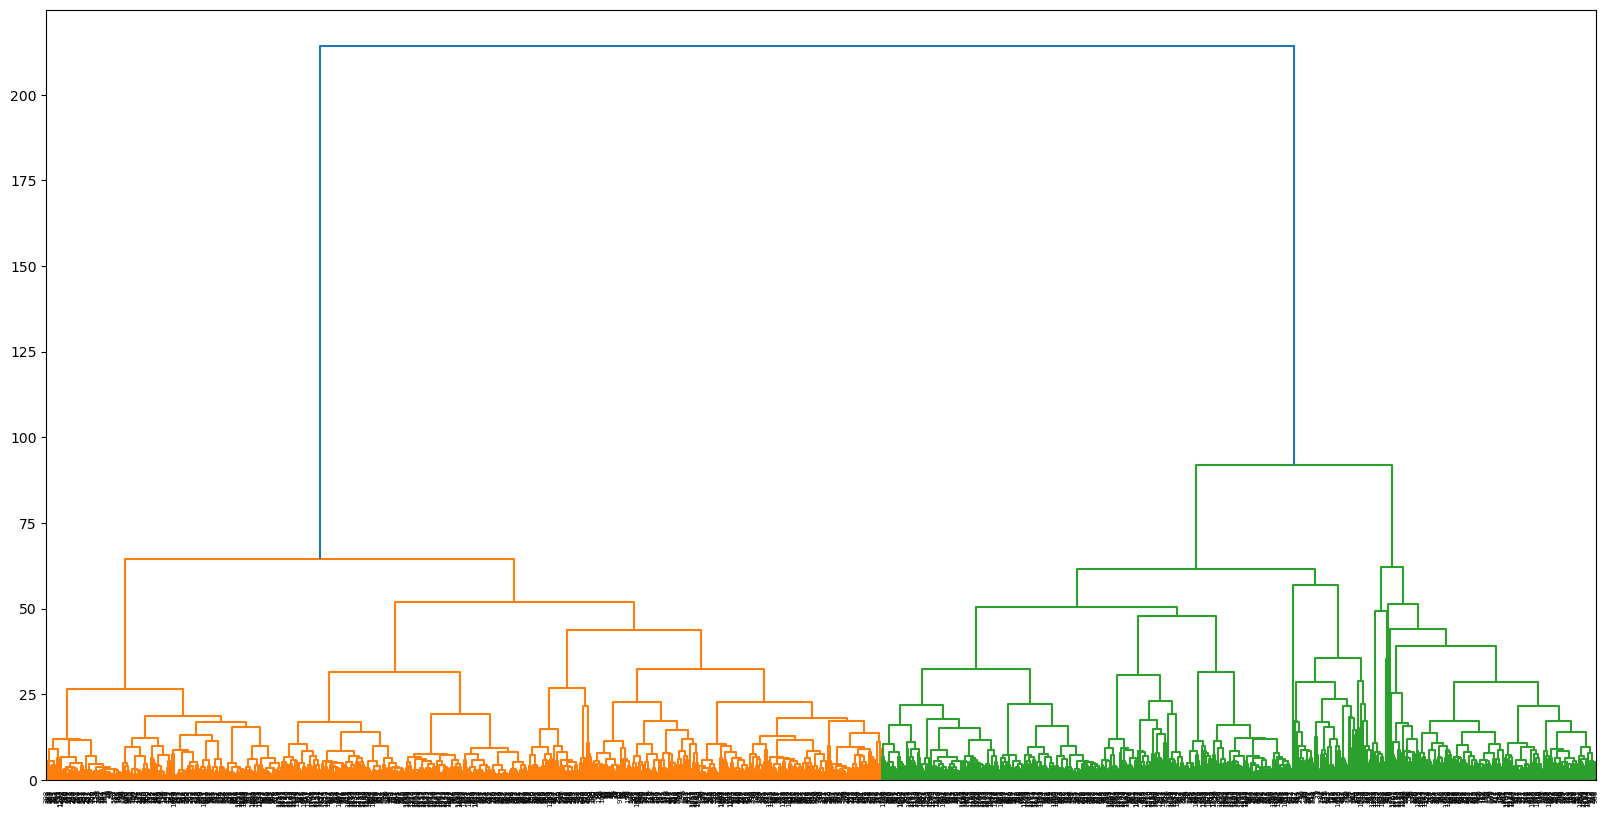

In [21]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()


In [121]:
from sklearn.cluster import DBSCAN
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=2, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
# DBScan returns worse silhouette score than PCA and agglomerative clustering

Adjusted Rand Index of the DBSCAN solution: 0.01117695084353495
The silhouette score of the DBSCAN solution: -0.2478738376464632


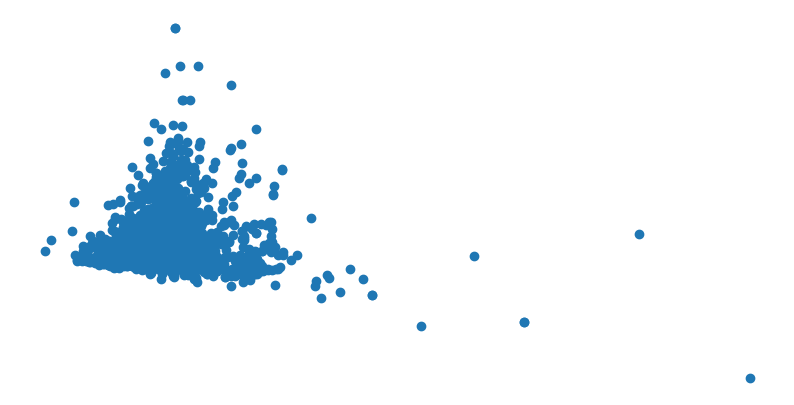

In [131]:
# You just want the first two principal components
pca = PCA(n_components=3)
# Get the components by 
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()



<Axes: >

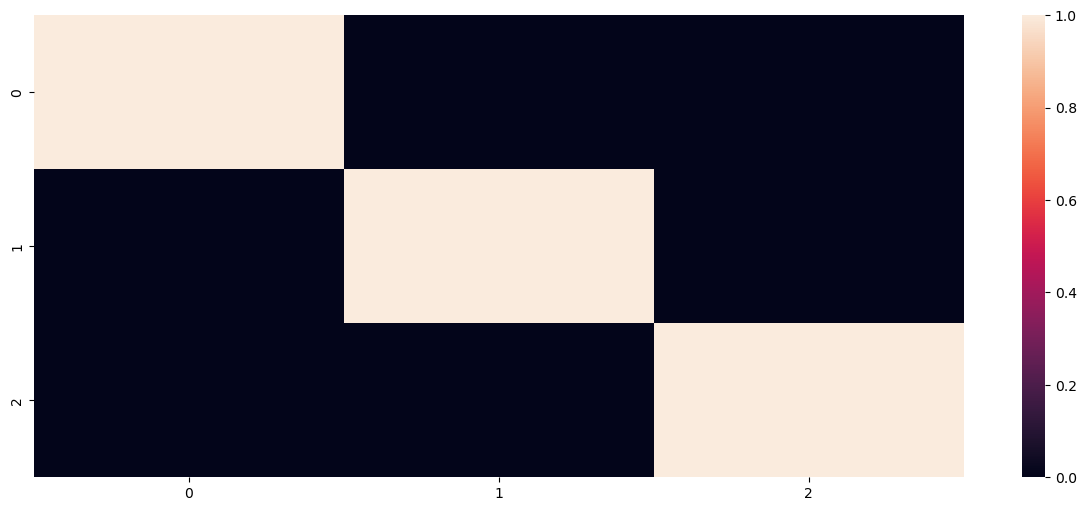

In [178]:
data_pca=pd.DataFrame(pca_components)
sns.heatmap(data_pca.corr())

In [123]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1634 samples in 0.001s...
[t-SNE] Computed neighbors for 1634 samples in 0.234s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1634
[t-SNE] Computed conditional probabilities for sample 1634 / 1634
[t-SNE] Mean sigma: 2015.162824
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.971016
[t-SNE] KL divergence after 300 iterations: 1.182395
t-SNE done! Time elapsed: 3.6741695404052734 seconds


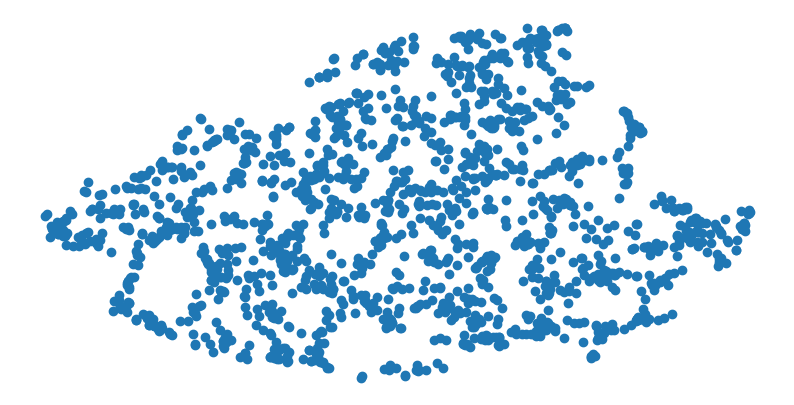

In [124]:
#low dimensional representation of the same
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


In [127]:
import umap
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))


UMAP done! Time elapsed: 2.8785042762756348 seconds


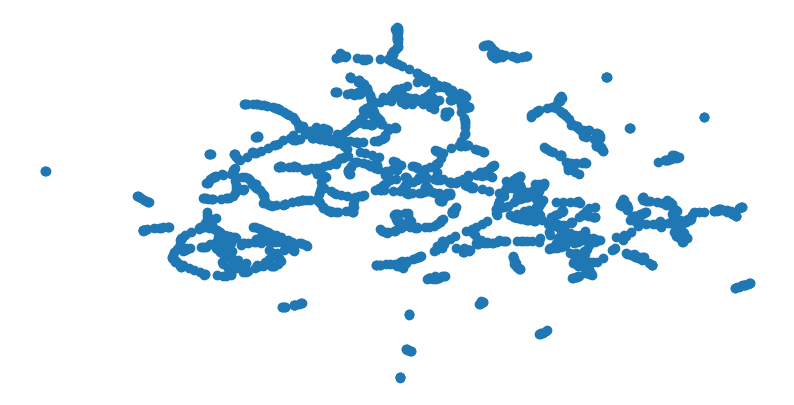

In [128]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

